# **1.Pregunta a resolver**

* ¿Cómo se puede identificar y segmentar eficazmente a los ciudadanos europeos en grupos homogéneos basados en su percepción política general, con el objetivo de diseñar y dirigir estrategias de comunicación y campañas informativas específicas de Europea que aborden las preocupaciones y necesidades de cada grupo, promoviendo así una percepción más positiva de la Europea y sus políticas?

# **2.Base de datos**

Utilizamos la base de datos European Social Survey 2 que tiene datos de opiniones o percepciones políticas de habitantes de 3 áreas europeas: norte, este y oeste.

* Todas las varibales se encuentran en una escala de 0 a 10.
* Fuente: https://ess-search.nsd.no/en/study/172ac431-2a06-41df-9dab-c1fd8f3877e7

## **2.1. Carga de datos y limpieza**

In [ ]:
# librerías
import pandas as pd #manipulación y análisis de datos
import matplotlib.pyplot as plt # gráficos
import numpy as np #cálculos numéricos
import scipy #computación científica, incluyendo estadísticas y optimización
import seaborn as sns #visualizaciones estadísticas
import sklearn #aprendizaje automático y minería de datos
from scipy.stats import norm
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler
import scipy.cluster.hierarchy as sch #algoritmos para la agrupación jerárquica de datos
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors #Proporciona funciones para buscar los vecinos más cercanos en datos.
from sklearn.cluster import DBSCAN #algoritmo DBSCAN para la agrupación de datos basada en densidad.
from scipy.stats import spearmanr, kendalltau #calcular coeficientes de correlación

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler
from sklearn.metrics import silhouette_samples,silhouette_score
from scipy.spatial.distance import cdist
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.cm as cm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Cargamos nuestro dataframe
data = pd.read_csv("/content/ESS10.csv")
#Mostramos las primeras 5 filas de nuestro dataframe
data.head()

<ipython-input-3-74629e8fe28b>:2: DtypeWarning: Columns (169,175,177,610,611) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/drive/MyDrive/UNAL/Cursos libres/FCE - Diplomado en ciencia de datos/Contenido programatico/4. MINERÍA DE DATOS/Proyecto minería de datos - Diplomado/ESS10.csv")


name  essround  edition    proddate   idno cntry   dweight   pspwght  \
0  ESS10e03_1        10      3.1  30.06.2023  10038    BE  0.882220  0.972276   
1  ESS10e03_1        10      3.1  30.06.2023  10053    BE  1.047643  0.888635   
2  ESS10e03_1        10      3.1  30.06.2023  10055    BE  1.087741  0.722811   
3  ESS10e03_1        10      3.1  30.06.2023  10062    BE  0.909910  1.005565   
4  ESS10e03_1        10      3.1  30.06.2023  10064    BE  0.918949  0.638705   

    pweight  anweight  ...                hinwe                iinwe  \
0  0.718075  0.698167  ...  2022-09-01 17:41:00  2022-09-01 17:41:00   
1  0.718075  0.638107  ...  2022-04-08 10:58:00  2022-04-08 10:59:00   
2  0.718075  0.519033  ...  2022-05-20 10:55:00  2022-05-20 10:56:00   
3  0.718075  0.722072  ...  2022-05-22 13:51:00  2022-05-22 13:53:00   
4  0.718075  0.458639  ...  2022-05-18 11:33:00  2022-05-18 11:34:00   

                 kinwe                vinwe                inwde  \
0  2022-09-01 17:46:00  2022-09-01 17:47:00  2022-09-01 17:47:00   
1  2022-04-08 11:04:00  2022-04-08 11:07:00  2022-04-08 11:10:00   
2  2022-05-20 11:04:00  2022-05-20 11:08:00  2022-05-20 11:10:00   
3  2022-05-22 13:57:00  2022-05-22 13:58:00  2022-05-22 13:59:00   
4  2022-05-18 11:39:00  2022-05-18 11:44:00  2022-05-18 11:45:00   

                 jinws                jinwe  inwtm  mode  domain  
0  2022-09-01 17:47:00  2022-09-01 17:47:00   36.0     1     1.0  
1  2022-04-08 11:07:00  2022-04-08 11:10:00   54.0     2     2.0  
2  2022-05-20 11:08:00  2022-05-20 11:10:00   77.0     1     2.0  
3  2022-05-22 13:58:00  2022-05-22 13:59:00   55.0     1     1.0  
4  2022-05-18 11:44:00  2022-05-18 11:45:00   55.0     1     1.0  

[5 rows x 618 columns]

In [ ]:
#El dataframe inicial tiene 37611 individuos y 618 columnas
data.shape

(37611, 618)

In [ ]:
#Filtramos nuestro dataframe con las columnas de interés
columnas_seleccion = ["ppltrst" , "pplfair" , "pplhlp" , "trstprl" , "trstlgl" , "trstplt", "trstep" , "trstun" , "euftf" , "imueclt" , "imwbcnt","stfdem"]
data_filtered = data[columnas_seleccion]
data_filtered

ppltrst  pplfair  pplhlp  trstprl  trstlgl  trstplt  trstep  trstun  \
0            6        7       4        7        7       88       8      88   
1            3        4       3        5        5        3       4       3   
2            6        8       5        6        8        6       7       8   
3            7        5       5        8       10        8      10      10   
4            3        8       8        7        7        7       6       7   
...        ...      ...     ...      ...      ...      ...     ...     ...   
37606        5        5       5        3        2        7       4       8   
37607        7        6       6        7        7        8       8      99   
37608        0        0       2        1        1        1       4       4   
37609        2        2       3        2        0        7       4       5   
37610        5        6       6        7        6        6       8       7   

       euftf  imueclt  imwbcnt  stfdem  
0          5        8        9       6  
1          5        5        5       5  
2          8        5        5       6  
3         88        8        8      10  
4          9        7        6       5  
...      ...      ...      ...     ...  
37606      9        8        6       4  
37607     10        7        6      10  
37608      8        2        2       7  
37609      5        8        1       2  
37610      6        4        4       8  

[37611 rows x 12 columns]

**Diccionario de data_filtered**

* ppltrst= La mayoría de las personas pueden ser confiables o no se puede ser demasiado cuidadoso
* pplfair:La mayoría de las personas intentan aprovecharse de ti, o intentan ser justas
* pplhlp:La mayor parte del tiempo, las personas intentan ser útiles o están principalmente preocupadas por sí mismas
* trstprl: confianza en el parlamento del país
* trstlgl: Confianza en el sistema legal
* trstplt: Confianza en políticos
* trstep: Confianza en el parlamento Europeo
* trstun: Confianza en Naciones Unidas
* euftf: ¿la unificación europea va más allá o ha ido demasiado lejos?
* imueclt: La vida cultural del país se ve menoscabada o enriquecida por los inmigrantes
* imwbcnt:Los inmigrantes hacen que el país sea un lugar peor o mejor para vivir
* stfdem:Qué tan satisfecho está con la democracia del país

In [ ]:
#Renombramos las columnas de manera que la manipulación y análisis sea más fácil de ahora en adelante
#Renombramos las columnas
data_filtered = data_filtered.rename(columns={'ppltrst':"people_trust",
                                              'pplfair':"people_fair",
                                              'pplhlp':"people_helpful",
                                              'trstprl':"trust_parliament",
                                              'trstlgl':"trust_legal_system",
                                              'trstplt':"trust_politicians",
                                              'trstep':"trust_european_parliament",
                                              "trstun":"trust_united_nations",
                                              "euftf":"european_unification",
                                              "imueclt":"inmigrants_cultural",
                                              "imwbcnt":"inmigrants_country",
                                              "stfdem":"satisfied_democracy"})
data_filtered

people_trust  people_fair  people_helpful  trust_parliament  \
0                 6            7               4                 7   
1                 3            4               3                 5   
2                 6            8               5                 6   
3                 7            5               5                 8   
4                 3            8               8                 7   
...             ...          ...             ...               ...   
37606             5            5               5                 3   
37607             7            6               6                 7   
37608             0            0               2                 1   
37609             2            2               3                 2   
37610             5            6               6                 7   

       trust_legal_system  trust_politicians  trust_european_parliament  \
0                       7                 88                          8   
1                       5                  3                          4   
2                       8                  6                          7   
3                      10                  8                         10   
4                       7                  7                          6   
...                   ...                ...                        ...   
37606                   2                  7                          4   
37607                   7                  8                          8   
37608                   1                  1                          4   
37609                   0                  7                          4   
37610                   6                  6                          8   

       trust_united_nations  european_unification  inmigrants_cultural  \
0                        88                     5                    8   
1                         3                     5                    5   
2                         8                     8                    5   
3                        10                    88                    8   
4                         7                     9                    7   
...                     ...                   ...                  ...   
37606                     8                     9                    8   
37607                    99                    10                    7   
37608                     4                     8                    2   
37609                     5                     5                    8   
37610                     7                     6                    4   

       inmigrants_country  satisfied_democracy  
0                       9                    6  
1                       5                    5  
2                       5                    6  
3                       8                   10  
4                       6                    5  
...                   ...                  ...  
37606                   6                    4  
37607                   6                   10  
37608                   2                    7  
37609                   1                    2  
37610                   4                    8  

[37611 rows x 12 columns]

**Diccionario de data_filtered**

* people_trust= La mayoría de las personas pueden ser confiables o no se puede ser demasiado cuidadoso. 0 La mayoría de las personas pueden no ser confiables 10 la mayoría de las personas pueden ser confiables.
* people_fair:La mayoría de las personas intentan aprovecharse de ti, o intentan ser justas.0 La mayoría de las personas intentan aprovecharse de ti 10 la mayoría de las personas intentan ser justas.
* people_helpful:La mayor parte del tiempo, las personas intentan ser útiles o están principalmente preocupadas por sí mismas. 0 están principalmente preocupadas por sí mismas 10 intentan ser útiles
* trust_parliament: confianza en el parlamento del país. 0 No hay confianza en lo absoluto 10 confianza total.
* trust_legal_system: Confianza en el sistema legal. 0 No hay confianza en lo absoluto 10 confianza total.
* trust_politicians: Confianza en políticos. 0 No hay confianza en lo absoluto 10 confianza total.
* trust_european_parliament: Confianza en el parlamento Europeo. 0 No hay confianza en lo absoluto 10 confianza total.
* trust_united_nations: Confianza en Naciones Unidas. 0 No hay confianza en lo absoluto 10 confianza total.
* european_unification: ¿la unificación europea va más allá o ha ido demasiado lejos?. 0 ha ido demasiado lejos 10 va más allá.
* inmigrants_cultural: La vida cultural del país se ve menoscabada o enriquecida por los inmigrantes. 0 se ve menoscabada 10 enriquecida.
* inmigrants_country:Los inmigrantes hacen que el país sea un lugar peor o mejor para vivir. 0 peor 10 mejor.
* stisfied_democracy: Qué tan satisfecho está con la democracia del país. 0 completamente insatisfecho 10 completament satisfecho.

Ahora bien, la escala en la que los individuos vota es de 0 al 10, sin embargo, dentro de la encuesta también están las opciones 77 que es rechazo, 88 no sabe y 99 no responde; números que general ruido en nuestro data set. De modo que, resulta oportuno hacerles tratamiento como si fuera valore snulos y reemplazarlos por la mediana respectiva de cada variable.

In [ ]:
#Dejamos estos numeros como valores nan
import numpy as np

for i in data_filtered.columns:
    data_filtered[i] = data_filtered[i].apply(lambda x: np.nan if x in (77, 88, 99) else x)
data_filtered

people_trust  people_fair  people_helpful  trust_parliament  \
0               6.0          7.0             4.0               7.0   
1               3.0          4.0             3.0               5.0   
2               6.0          8.0             5.0               6.0   
3               7.0          5.0             5.0               8.0   
4               3.0          8.0             8.0               7.0   
...             ...          ...             ...               ...   
37606           5.0          5.0             5.0               3.0   
37607           7.0          6.0             6.0               7.0   
37608           0.0          0.0             2.0               1.0   
37609           2.0          2.0             3.0               2.0   
37610           5.0          6.0             6.0               7.0   

       trust_legal_system  trust_politicians  trust_european_parliament  \
0                     7.0                NaN                        8.0   
1                     5.0                3.0                        4.0   
2                     8.0                6.0                        7.0   
3                    10.0                8.0                       10.0   
4                     7.0                7.0                        6.0   
...                   ...                ...                        ...   
37606                 2.0                7.0                        4.0   
37607                 7.0                8.0                        8.0   
37608                 1.0                1.0                        4.0   
37609                 0.0                7.0                        4.0   
37610                 6.0                6.0                        8.0   

       trust_united_nations  european_unification  inmigrants_cultural  \
0                       NaN                   5.0                  8.0   
1                       3.0                   5.0                  5.0   
2                       8.0                   8.0                  5.0   
3                      10.0                   NaN                  8.0   
4                       7.0                   9.0                  7.0   
...                     ...                   ...                  ...   
37606                   8.0                   9.0                  8.0   
37607                   NaN                  10.0                  7.0   
37608                   4.0                   8.0                  2.0   
37609                   5.0                   5.0                  8.0   
37610                   7.0                   6.0                  4.0   

       inmigrants_country  satisfied_democracy  
0                     9.0                  6.0  
1                     5.0                  5.0  
2                     5.0                  6.0  
3                     8.0                 10.0  
4                     6.0                  5.0  
...                   ...                  ...  
37606                 6.0                  4.0  
37607                 6.0                 10.0  
37608                 2.0                  7.0  
37609                 1.0                  2.0  
37610                 4.0                  8.0  

[37611 rows x 12 columns]

In [ ]:
#Nos aseguramos de que si los lea como nan
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37611 entries, 0 to 37610
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   people_trust               37490 non-null  float64
 1   people_fair                37399 non-null  float64
 2   people_helpful             37475 non-null  float64
 3   trust_parliament           36903 non-null  float64
 4   trust_legal_system         36993 non-null  float64
 5   trust_politicians          37112 non-null  float64
 6   trust_european_parliament  35366 non-null  float64
 7   trust_united_nations       34804 non-null  float64
 8   european_unification       35086 non-null  float64
 9   inmigrants_cultural        36618 non-null  float64
 10  inmigrants_country         36465 non-null  float64
 11  satisfied_democracy        36746 non-null  float64
dtypes: float64(12)
memory usage: 3.4 MB


In [ ]:
#Reemplazamos estos valores nulos por la mediana
data_filtered = data_filtered.fillna(data_filtered.median())
data_filtered

people_trust  people_fair  people_helpful  trust_parliament  \
0               6.0          7.0             4.0               7.0   
1               3.0          4.0             3.0               5.0   
2               6.0          8.0             5.0               6.0   
3               7.0          5.0             5.0               8.0   
4               3.0          8.0             8.0               7.0   
...             ...          ...             ...               ...   
37606           5.0          5.0             5.0               3.0   
37607           7.0          6.0             6.0               7.0   
37608           0.0          0.0             2.0               1.0   
37609           2.0          2.0             3.0               2.0   
37610           5.0          6.0             6.0               7.0   

       trust_legal_system  trust_politicians  trust_european_parliament  \
0                     7.0                4.0                        8.0   
1                     5.0                3.0                        4.0   
2                     8.0                6.0                        7.0   
3                    10.0                8.0                       10.0   
4                     7.0                7.0                        6.0   
...                   ...                ...                        ...   
37606                 2.0                7.0                        4.0   
37607                 7.0                8.0                        8.0   
37608                 1.0                1.0                        4.0   
37609                 0.0                7.0                        4.0   
37610                 6.0                6.0                        8.0   

       trust_united_nations  european_unification  inmigrants_cultural  \
0                       5.0                   5.0                  8.0   
1                       3.0                   5.0                  5.0   
2                       8.0                   8.0                  5.0   
3                      10.0                   5.0                  8.0   
4                       7.0                   9.0                  7.0   
...                     ...                   ...                  ...   
37606                   8.0                   9.0                  8.0   
37607                   5.0                  10.0                  7.0   
37608                   4.0                   8.0                  2.0   
37609                   5.0                   5.0                  8.0   
37610                   7.0                   6.0                  4.0   

       inmigrants_country  satisfied_democracy  
0                     9.0                  6.0  
1                     5.0                  5.0  
2                     5.0                  6.0  
3                     8.0                 10.0  
4                     6.0                  5.0  
...                   ...                  ...  
37606                 6.0                  4.0  
37607                 6.0                 10.0  
37608                 2.0                  7.0  
37609                 1.0                  2.0  
37610                 4.0                  8.0  

[37611 rows x 12 columns]

In [ ]:
#Confirmamos que no hayan valores nulos en el data frame.
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37611 entries, 0 to 37610
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   people_trust               37611 non-null  float64
 1   people_fair                37611 non-null  float64
 2   people_helpful             37611 non-null  float64
 3   trust_parliament           37611 non-null  float64
 4   trust_legal_system         37611 non-null  float64
 5   trust_politicians          37611 non-null  float64
 6   trust_european_parliament  37611 non-null  float64
 7   trust_united_nations       37611 non-null  float64
 8   european_unification       37611 non-null  float64
 9   inmigrants_cultural        37611 non-null  float64
 10  inmigrants_country         37611 non-null  float64
 11  satisfied_democracy        37611 non-null  float64
dtypes: float64(12)
memory usage: 3.4 MB


# **3.Descripción de la base de datos**

In [ ]:
#Estadística descriptiva de nuestro dataframe
data_filtered.describe()

people_trust   people_fair  people_helpful  trust_parliament  \
count  37611.000000  37611.000000    37611.000000      37611.000000   
mean       4.988142      5.489139        4.891441          4.501582   
std        2.530719      2.329426        2.405600          2.661276   
min        0.000000      0.000000        0.000000          0.000000   
25%        3.000000      4.000000        3.000000          2.000000   
50%        5.000000      6.000000        5.000000          5.000000   
75%        7.000000      7.000000        7.000000          7.000000   
max       10.000000     10.000000       10.000000         10.000000   

       trust_legal_system  trust_politicians  trust_european_parliament  \
count        37611.000000       37611.000000               37611.000000   
mean             5.225094           3.706708                   4.786472   
std              2.768111           2.487788                   2.502985   
min              0.000000           0.000000                   0.000000   
25%              3.000000           2.000000                   3.000000   
50%              5.000000           4.000000                   5.000000   
75%              7.000000           6.000000                   7.000000   
max             10.000000          10.000000                  10.000000   

       trust_united_nations  european_unification  inmigrants_cultural  \
count          37611.000000          37611.000000         37611.000000   
mean               5.229826              5.387466             5.406211   
std                2.509357              2.521898             2.636761   
min                0.000000              0.000000             0.000000   
25%                4.000000              4.000000             4.000000   
50%                5.000000              5.000000             5.000000   
75%                7.000000              7.000000             7.000000   
max               10.000000             10.000000            10.000000   

       inmigrants_country  satisfied_democracy  
count        37611.000000         37611.000000  
mean             5.076813             5.315679  
std              2.416173             2.557943  
min              0.000000             0.000000  
25%              4.000000             4.000000  
50%              5.000000             6.000000  
75%              7.000000             7.000000  
max             10.000000            10.000000

In [ ]:
#Frecuencias absolutas de "people_trust"
data_filtered["people_trust"].value_counts()

5.0     6961
7.0     5697
8.0     4426
6.0     4255
3.0     3849
4.0     3602
0.0     2753
2.0     2610
1.0     1391
9.0     1249
10.0     818
Name: people_trust, dtype: int64

In [ ]:
#Dataframe con las frecuencias absolutas
frecuencias_absolutas = pd.DataFrame()
for i in data_filtered.columns:
  frecuencias_absolutas[i]= data_filtered[i].value_counts()

frecuencias_absolutas = frecuencias_absolutas.sort_index(ascending=True)
frecuencias_absolutas

people_trust  people_fair  people_helpful  trust_parliament  \
0.0           2753         1487            2222              4287   
1.0           1391          865            1284              1952   
2.0           2610         1904            2933              3196   
3.0           3849         3146            4248              4022   
4.0           3602         3535            4339              3289   
5.0           6961         7631            7436              7002   
6.0           4255         4793            4567              4186   
7.0           5697         6359            5220              4460   
8.0           4426         5260            3475              3335   
9.0           1249         1615            1070              1103   
10.0           818         1016             817               779   

      trust_legal_system  trust_politicians  trust_european_parliament  \
0.0                 3239               5882                       3312   
1.0                 1467               2695                       1561   
2.0                 2562               4222                       2612   
3.0                 2995               4591                       3206   
4.0                 2992               4719                       3290   
5.0                 6025               6074                       8991   
6.0                 4094               3962                       4725   
7.0                 5030               3214                       4781   
8.0                 5076               1563                       3268   
9.0                 2840                409                       1105   
10.0                1291                280                        760   

      trust_united_nations  european_unification  inmigrants_cultural  \
0.0                   2565                  2027                 2461   
1.0                   1286                  1027                 1117   
2.0                   2136                  1962                 2084   
3.0                   2578                  2845                 2918   
4.0                   2826                  2739                 2926   
5.0                   9071                 10943                 8319   
6.0                   4652                  3782                 4034   
7.0                   5192                  4345                 4926   
8.0                   4363                  3844                 4555   
9.0                   1832                  1358                 1841   
10.0                  1110                  2739                 2430   

      inmigrants_country  satisfied_democracy  
0.0                 2339                 2364  
1.0                 1166                 1216  
2.0                 2131                 2357  
3.0                 3025                 3256  
4.0                 3229                 3372  
5.0                11423                 5778  
6.0                 3964                 5489  
7.0                 4256                 5600  
8.0                 3361                 4976  
9.0                 1224                 2120  
10.0                1493                 1083

In [ ]:
#Dataframe con las frecuencias relativas
frecuencias_relativas = pd.DataFrame()
for i in data_filtered.columns:
  frecuencias_relativas[i]= data_filtered[i].value_counts() / len(data_filtered[i])

frecuencias_relativas = frecuencias_relativas.sort_index(ascending=True)
frecuencias_relativas

people_trust  people_fair  people_helpful  trust_parliament  \
0.0       0.073197     0.039536        0.059078          0.113983   
1.0       0.036984     0.022999        0.034139          0.051900   
2.0       0.069395     0.050623        0.077983          0.084975   
3.0       0.102337     0.083646        0.112946          0.106937   
4.0       0.095770     0.093988        0.115365          0.087448   
5.0       0.185079     0.202893        0.197708          0.186169   
6.0       0.113132     0.127436        0.121427          0.111297   
7.0       0.151472     0.169073        0.138789          0.118582   
8.0       0.117678     0.139853        0.092393          0.088671   
9.0       0.033208     0.042940        0.028449          0.029327   
10.0      0.021749     0.027013        0.021722          0.020712   

      trust_legal_system  trust_politicians  trust_european_parliament  \
0.0             0.086118           0.156390                   0.088059   
1.0             0.039005           0.071655                   0.041504   
2.0             0.068118           0.112254                   0.069448   
3.0             0.079631           0.122065                   0.085241   
4.0             0.079551           0.125469                   0.087474   
5.0             0.160192           0.161495                   0.239052   
6.0             0.108851           0.105342                   0.125628   
7.0             0.133737           0.085454                   0.127117   
8.0             0.134961           0.041557                   0.086889   
9.0             0.075510           0.010874                   0.029380   
10.0            0.034325           0.007445                   0.020207   

      trust_united_nations  european_unification  inmigrants_cultural  \
0.0               0.068198              0.053894             0.065433   
1.0               0.034192              0.027306             0.029699   
2.0               0.056792              0.052166             0.055409   
3.0               0.068544              0.075643             0.077584   
4.0               0.075138              0.072824             0.077796   
5.0               0.241179              0.290952             0.221185   
6.0               0.123687              0.100556             0.107256   
7.0               0.138045              0.115525             0.130972   
8.0               0.116003              0.102204             0.121108   
9.0               0.048709              0.036106             0.048948   
10.0              0.029513              0.072824             0.064609   

      inmigrants_country  satisfied_democracy  
0.0             0.062189             0.062854  
1.0             0.031002             0.032331  
2.0             0.056659             0.062668  
3.0             0.080429             0.086570  
4.0             0.085853             0.089655  
5.0             0.303714             0.153625  
6.0             0.105395             0.145941  
7.0             0.113158             0.148893  
8.0             0.089362             0.132302  
9.0             0.032544             0.056366  
10.0            0.039696             0.028795

## **3.1. Visualización de nuestros datos**

In [ ]:
# #Visualizamos
# from matplotlib import pyplot as plt
# import seaborn as sns

# fig=plt.figure(figsize=(20,30))
# for i, feature in enumerate(frecuencias_relativas):
#     ax=fig.add_subplot(10,2,i+1)
#     sns.distplot(frecuencias_relativas[feature], bins=14, kde=False)
#     ax.set_title(feature+" Distribution")

# fig.tight_layout()
# plt.show()

In [ ]:
# fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
# fig.suptitle('Diagramas de Frecuencia', fontsize=16)

# # Generar histograma para cada columna
# for i, col in enumerate(frecuencias_relativas.columns):
#     ax = axes[i // 4, i % 4]
#     frecuencias_relativas[col].hist(ax=ax, bins=5, edgecolor='k')
#     ax.set_title(col)

# # Ajustar el espacio entre subplots
# plt.tight_layout()
# plt.subplots_adjust(top=0.9)

# # Mostrar el gráfico
# plt.show()

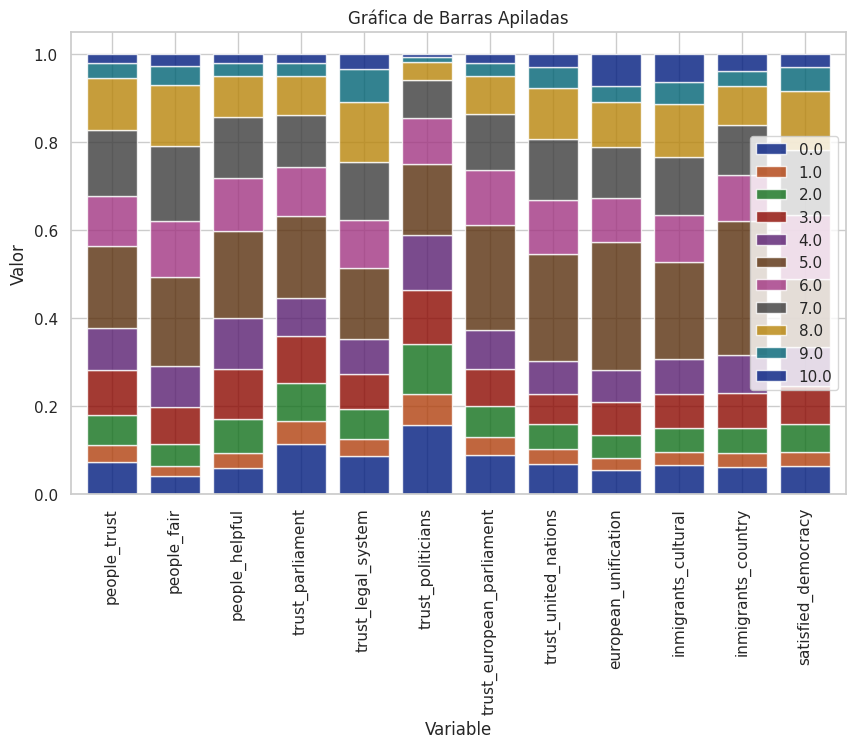

In [ ]:
#Visualizamos

sns.set(style="whitegrid")
colores = sns.color_palette("dark")

fig, ax = plt.subplots(figsize=(10, 6))  # Ajusta el tamaño de la figura

barras = frecuencias_relativas.transpose().plot(kind='bar', stacked=True, color=colores, width=0.8, alpha=0.8, ax=ax)


# Personalizar la gráfica
plt.title('Gráfica de Barras Apiladas')
plt.xlabel('Variable')
plt.ylabel('Valor')

# Mostrar la gráfica
plt.show()

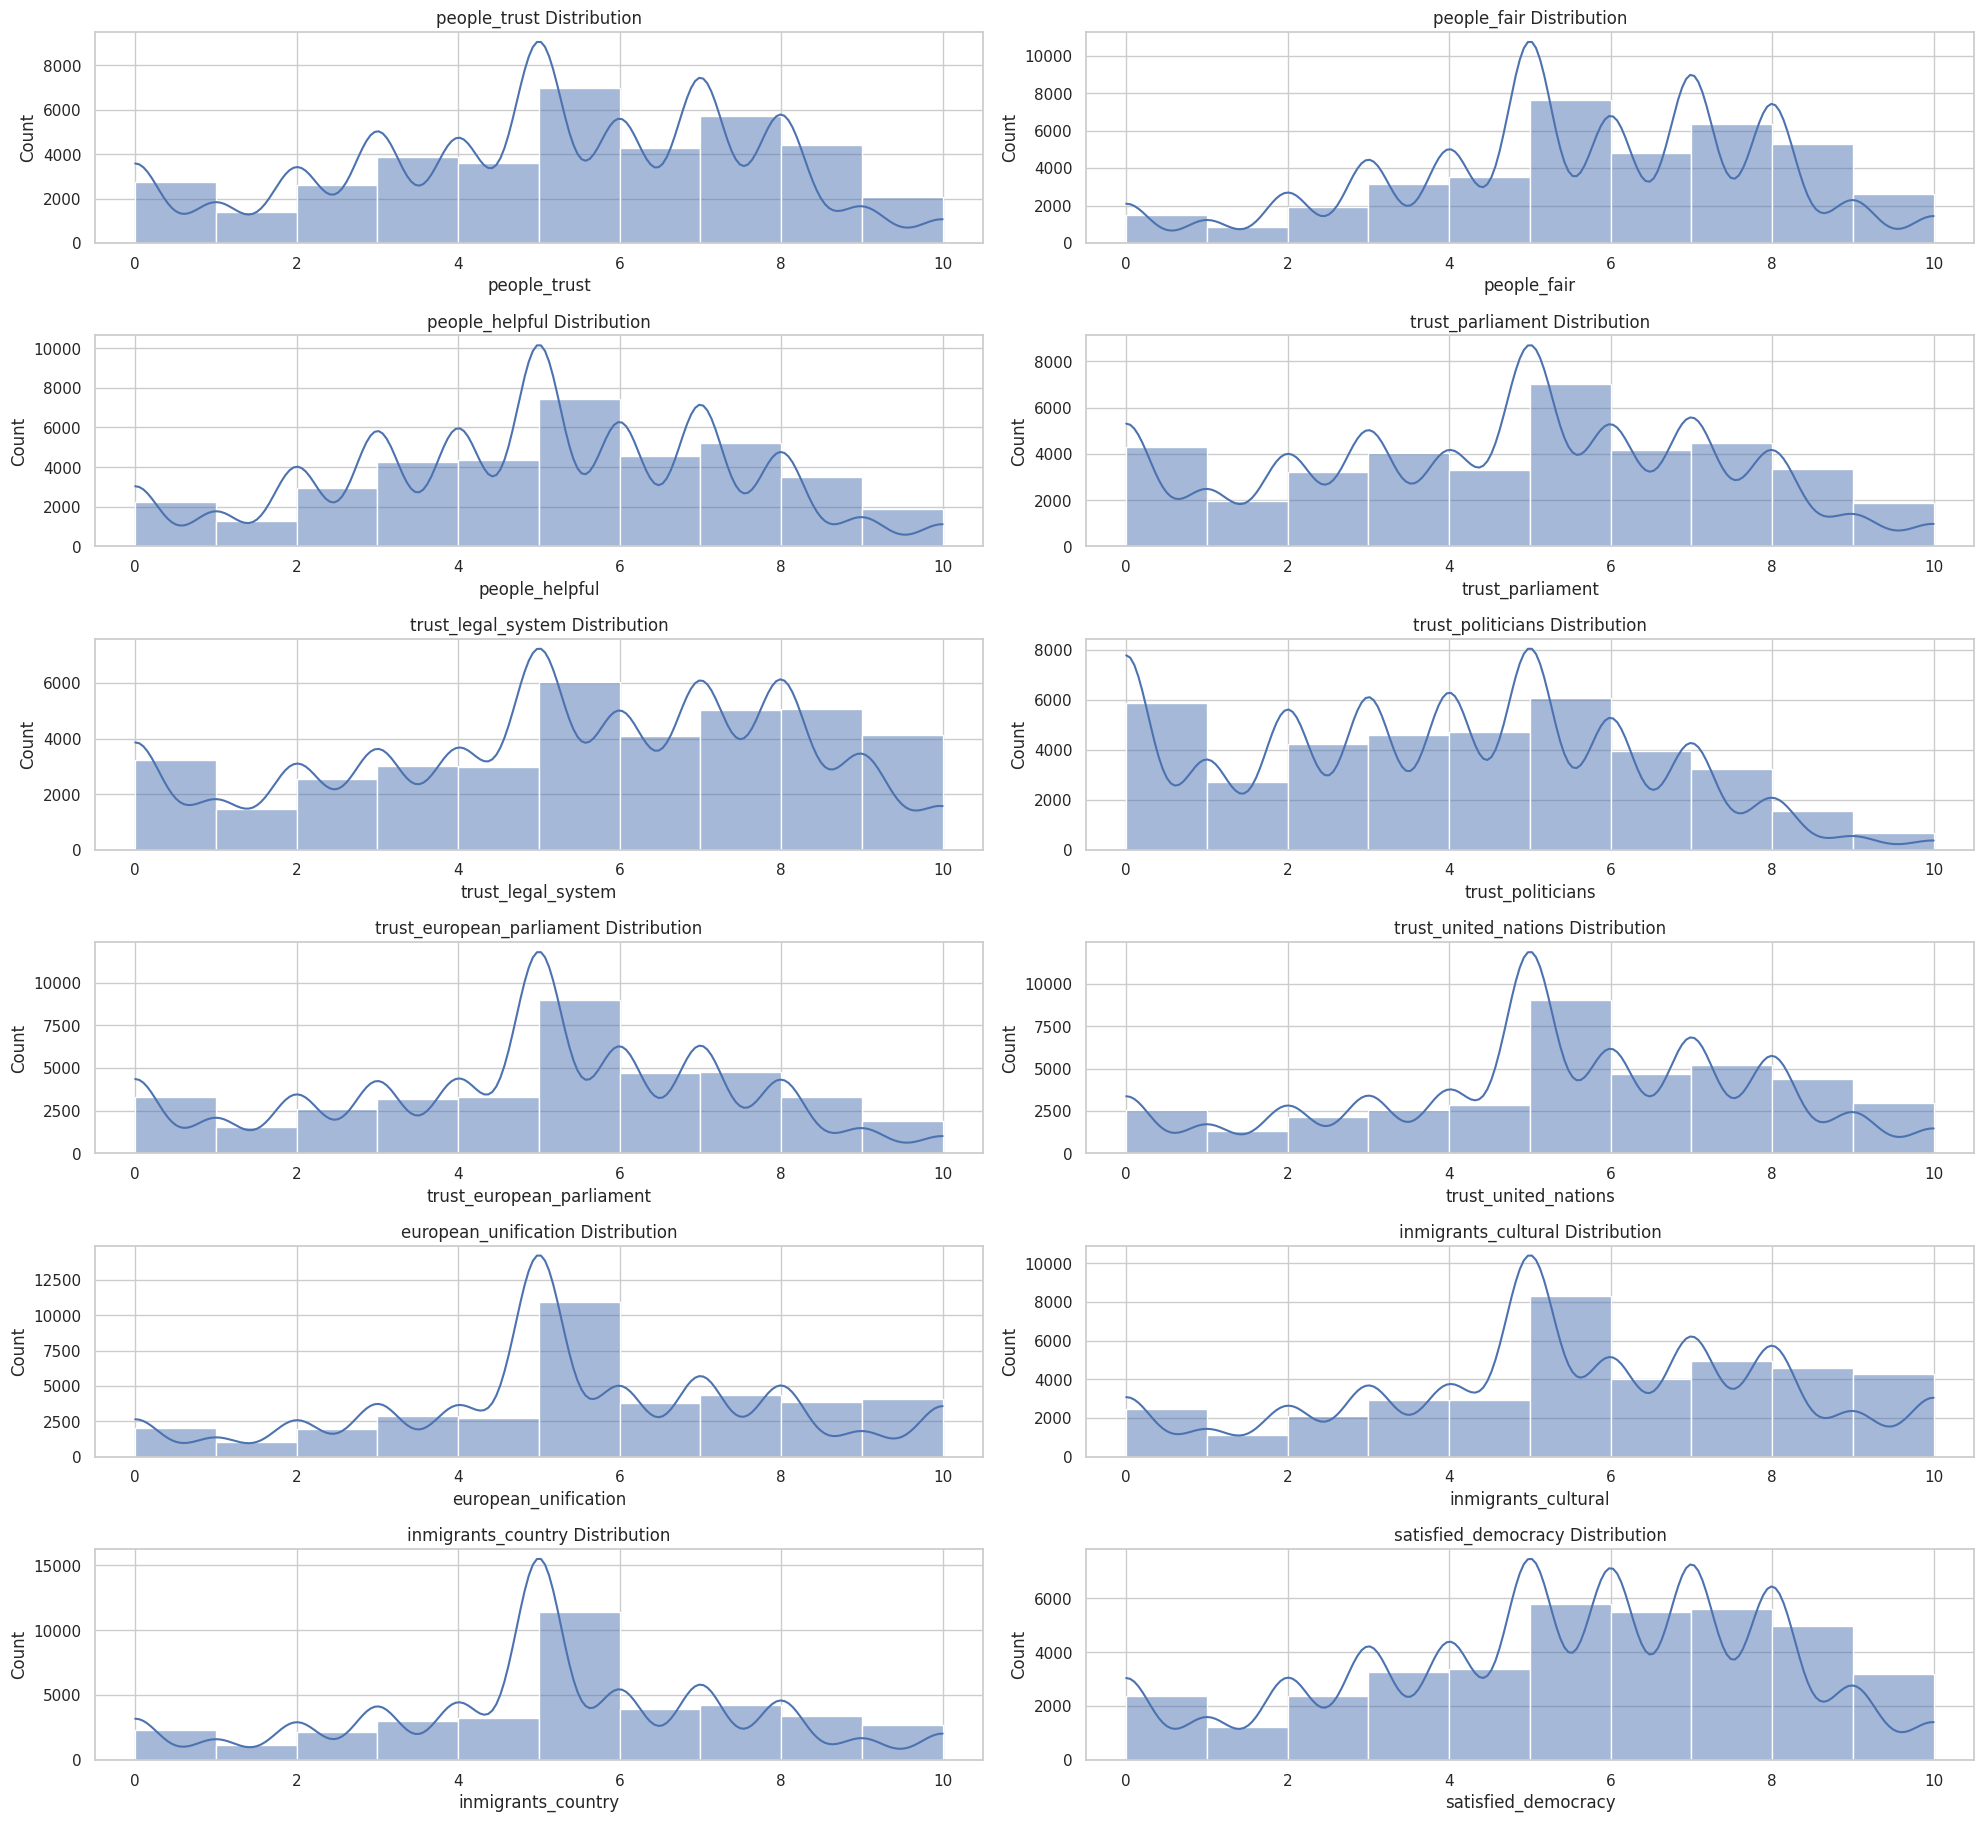

In [ ]:
#Visualizamos la frecuencia de los datos

fig=plt.figure(figsize=(20,30))
for i, feature in enumerate(data_filtered):
    ax=fig.add_subplot(10,2,i+1)
    sns.histplot(data_filtered[feature], kde=True, bins = 10, binrange = (0,10), discrete = False)
    ax.set_title(feature+" Distribution")

fig.tight_layout()
plt.show()

### **3.1.1. Relación entre las variables y la confianza con la democracia del país**

- Cada uno de estos gráficos representa la relación entre la variable en el eje x (por ejemplo, 'people_trust', 'people_fair', etc.) y la variable stisfied_democracy en el eje y.
- Se utiliza la mediana como estimador para calcular un valor resumen de la variable satisfied_democracy en cada categoría de la variable en el eje x. La mediana es una medida de tendencia central que se encuentra en el punto medio de un conjunto de datos ordenados. En este contexto, la mediana representa la tendencia central de la satisfacción con la democracia en cada categoría.

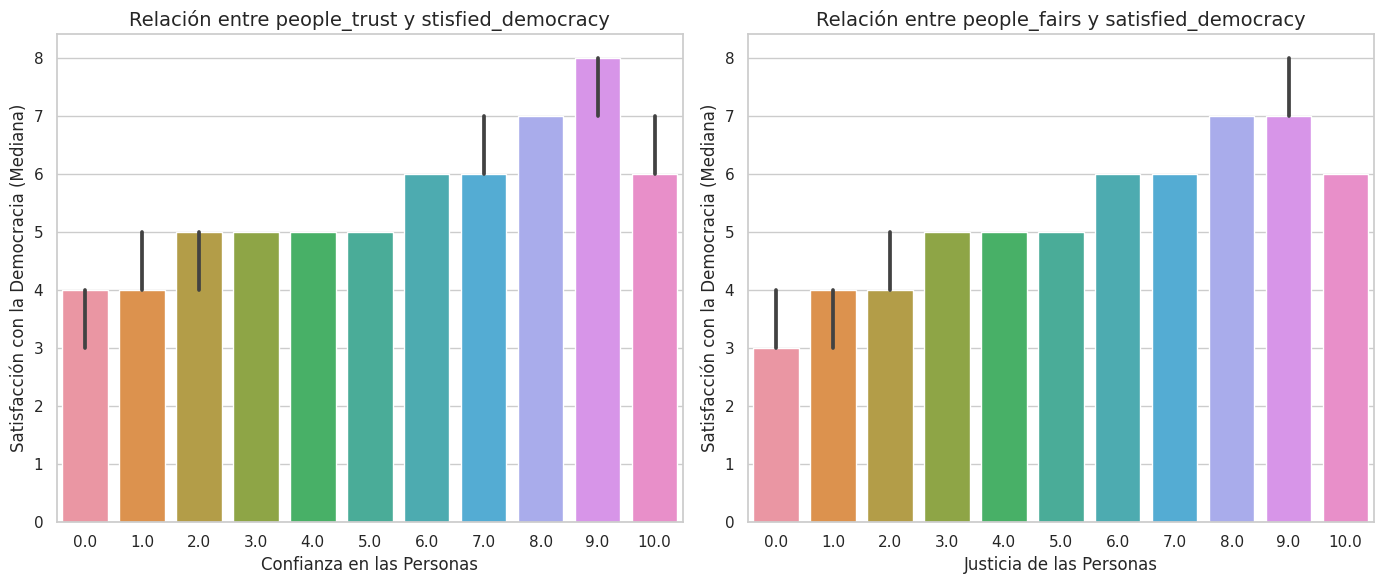

In [ ]:
# Configura el tamaño de la figura
plt.figure(figsize=(14, 6))

# Gráfico de Barras para 'people_trust' vs. 'stisfied_democracy' (Usando la mediana)
plt.subplot(121)
sns.barplot(x=data_filtered['people_trust'], y=data_filtered['satisfied_democracy'], estimator=np.median)  # Usa np.median en lugar de median
plt.xlabel('Confianza en las Personas', fontsize=12)
plt.ylabel('Satisfacción con la Democracia (Mediana)', fontsize=12)
plt.title('Relación entre people_trust y stisfied_democracy', fontsize=14)

# Gráfico de Barras para 'people_fair' vs. 'stisfied_democracy' (Usando la mediana)
plt.subplot(122)
sns.barplot(x=data_filtered['people_fair'], y=data_filtered['satisfied_democracy'], estimator=np.median)  # Usa np.median en lugar de median
plt.xlabel('Justicia de las Personas', fontsize=12)
plt.ylabel('Satisfacción con la Democracia (Mediana)', fontsize=12)
plt.title('Relación entre people_fairs y satisfied_democracy', fontsize=14)

# Ajusta el espacio entre los gráficos
plt.tight_layout()

# Muestra los gráficos
plt.show()


**Análisis relación satisfacción con la democracia y confianza en las personas**

Cuando el nivel de confianza en las personas ('people_trust') es 0, la mediana de la satisfacción con la democracia ('stisfied_democracy') es 4. Cuando el nivel de confianza en las personas es 1, la mediana de la satisfacción con la democracia es 4. Cuando el nivel de confianza en las personas es 2, la mediana de la satisfacción con la democracia es 5. Cuando el nivel de confianza en las personas es 3, la mediana de la satisfacción con la democracia es 5. Cuando el nivel de confianza en las personas es 4, la mediana de la satisfacción con la democracia es 5. Cuando el nivel de confianza en las personas es 5, la mediana de la satisfacción con la democracia es 5. Etc.

En general el gráfico muestra cómo la satisfacción con la democracia varía en función del nivel de percepción de justicia de las personas ('people_fair'). A medida que este nivel aumenta, la mediana de la satisfacción con la democracia tiende a aumentar. Sin embargo, la relación no es completamente lineal, ya que hay algunas variaciones en la mediana en diferentes niveles de percepción.

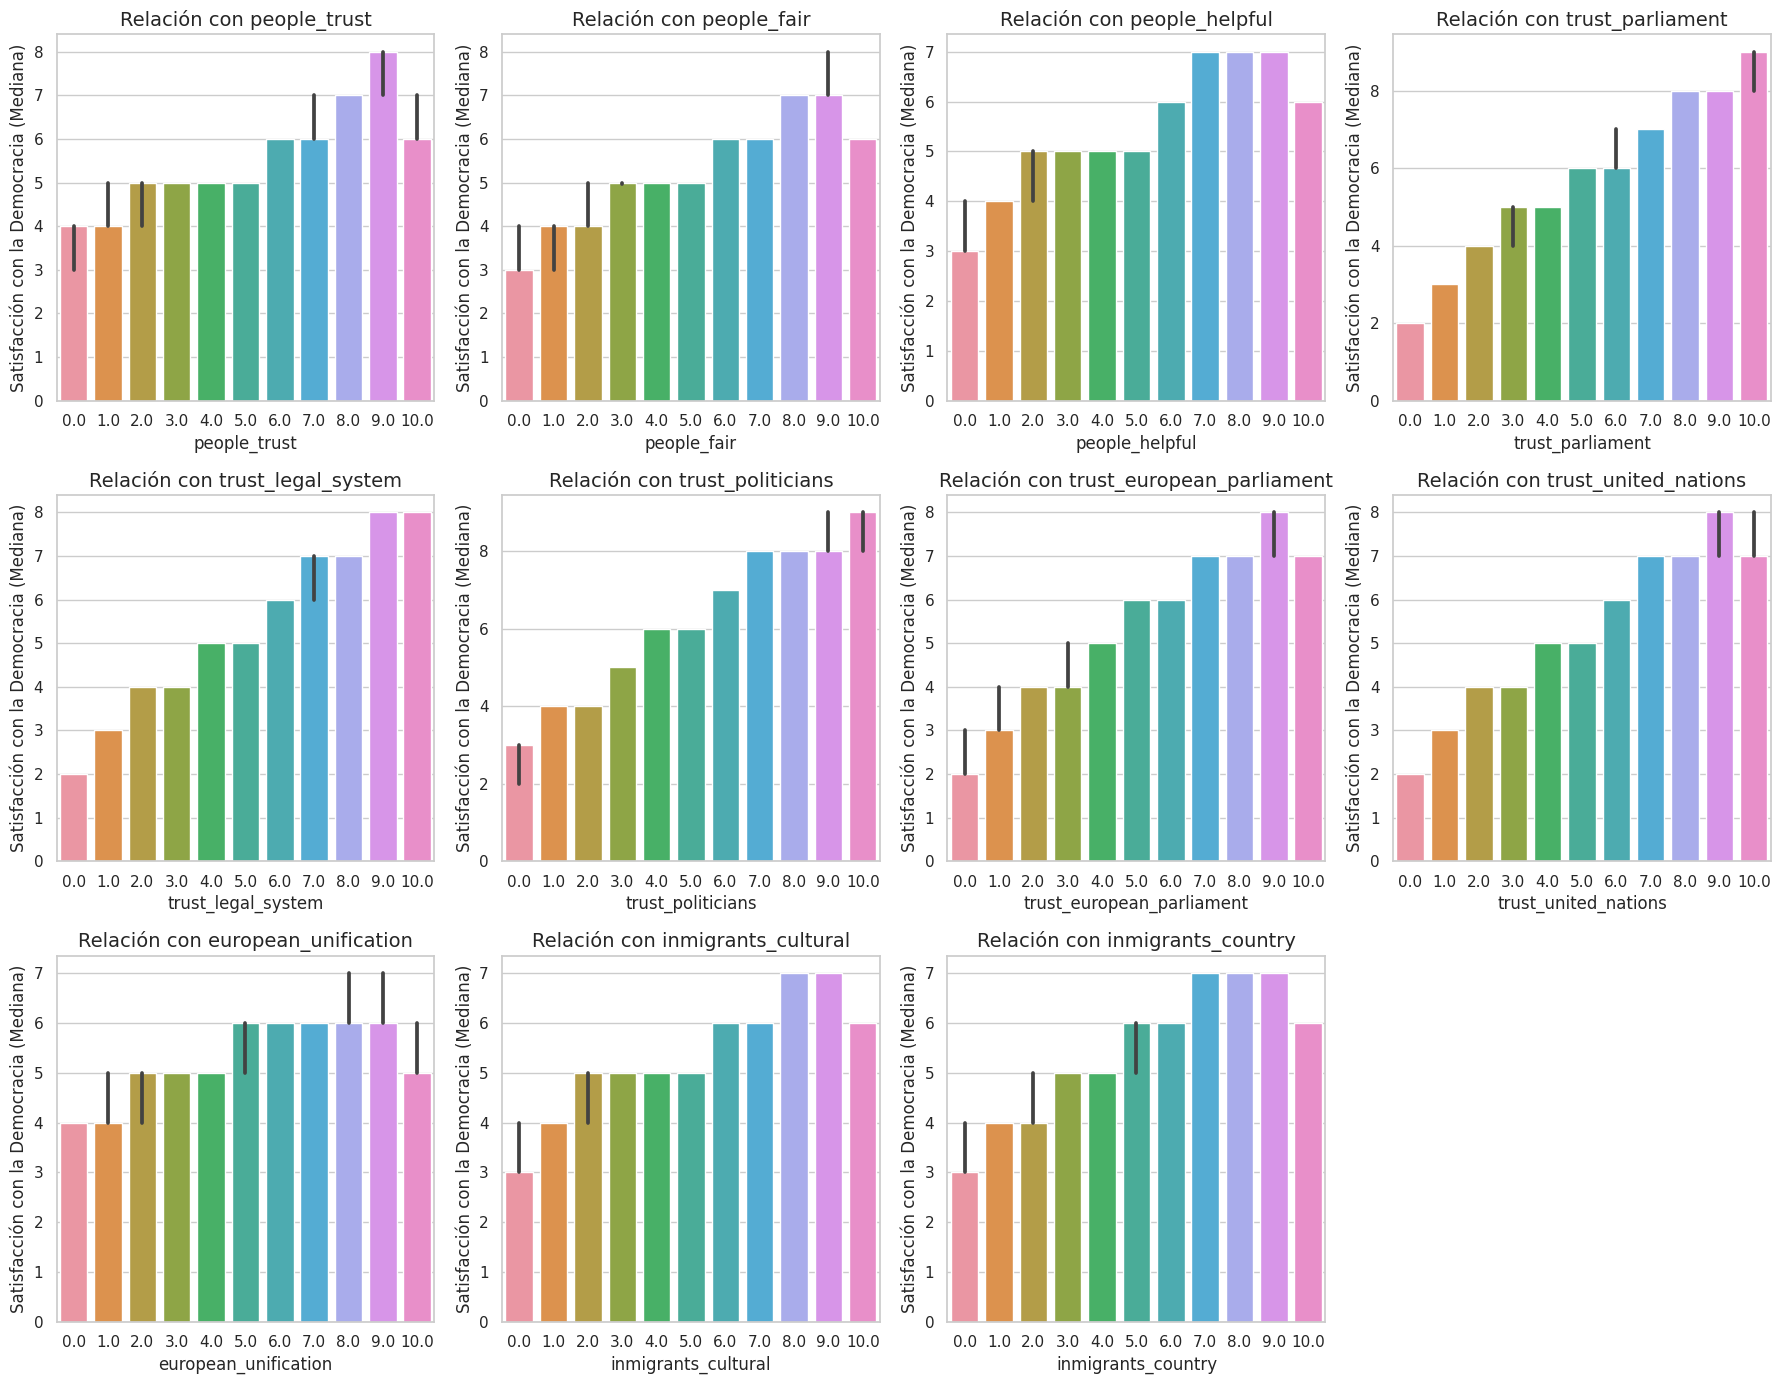

In [ ]:
# Lista de columnas a considerar en los gráficos (excluyendo 'stisfied_democracy')
columns_to_plot = ['people_trust', 'people_fair', 'people_helpful', 'trust_parliament',
                   'trust_legal_system', 'trust_politicians', 'trust_european_parliament',
                   'trust_united_nations', 'european_unification', 'inmigrants_cultural', 'inmigrants_country']

# Configura el tamaño de la figura
plt.figure(figsize=(18, 14))

# Itera a través de las columnas y crea gráficos de barras
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 4, i)  # Ajusta el número de filas y columnas según la cantidad de variables
    sns.barplot(x=data_filtered[column], y=data_filtered['satisfied_democracy'], estimator=np.median)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Satisfacción con la Democracia (Mediana)', fontsize=12)
    plt.title(f'Relación con {column}', fontsize=14)

# Ajusta el espacio entre los gráficos
plt.tight_layout()

# Muestra los gráficos
plt.show()

### **3.1.2. Cuántificando la relación entre las variables**

In [ ]:
variable1 = data_filtered['inmigrants_country']
variable2 = data_filtered['people_trust']

# Correlación de rango de Spearman
spearman_corr, _ = spearmanr(variable1, variable2)
print(f"Correlación de rango de Spearman: {spearman_corr}")

# Coeficiente de correlación de rango de Kendall (tau de Kendall)
kendall_corr, _ = kendalltau(variable1, variable2)
print(f"Coeficiente de correlación de Kendall: {kendall_corr}")

Correlación de rango de Spearman: 0.2683354161660913
Coeficiente de correlación de Kendall: 0.20793670604265602


* Correlación de rango de Spearman: 0.2683 -> indica una correlación positiva débil entre inmigrants_country y people_trust
* Coeficiente de correlación de Kendall: 0.2079 -> indica una correlación positiva débil entre inmigrants_country y people_trust

In [ ]:
variable1 = data_filtered['inmigrants_cultural']
variable2 = data_filtered['people_trust']

# Correlación de rango de Spearman
spearman_corr, _ = spearmanr(variable1, variable2)
print(f"Correlación de rango de Spearman: {spearman_corr}")

# Coeficiente de correlación de rango de Kendall (tau de Kendall)
kendall_corr, _ = kendalltau(variable1, variable2)
print(f"Coeficiente de correlación de Kendall: {kendall_corr}")

Correlación de rango de Spearman: 0.270300681474059
Coeficiente de correlación de Kendall: 0.20778209163125824


* Correlación de rango de Spearman: 0.2703 -> indica una correlación positiva débil entre inmigrants_cultural y people_trust
* Coeficiente de correlación de Kendall: 0.2077 -> indica una correlación positiva débil entre inmigrants_cultural y people_trust

In [ ]:
data_filtered.columns

Index(['people_trust', 'people_fair', 'people_helpful', 'trust_parliament',
       'trust_legal_system', 'trust_politicians', 'trust_european_parliament',
       'trust_united_nations', 'european_unification', 'inmigrants_cultural',
       'inmigrants_country', 'satisfied_democracy'],
      dtype='object')

In [ ]:
variable1 = data_filtered['satisfied_democracy']
variable2 = data_filtered['trust_politicians']

# Correlación de rango de Spearman
spearman_corr, _ = spearmanr(variable1, variable2)
print(f"Correlación de rango de Spearman: {spearman_corr}")

# Coeficiente de correlación de rango de Kendall (tau de Kendall)
kendall_corr, _ = kendalltau(variable1, variable2)
print(f"Coeficiente de correlación de Kendall: {kendall_corr}")

Correlación de rango de Spearman: 0.5841410695070733
Coeficiente de correlación de Kendall: 0.4630458443209474


* Correlación de rango de Spearman: 0.5841 -> indica una correlación positiva moderadamente fuerte entre satisfied_democracy y trust_politicians
* Coeficiente de correlación de Kendall: 0.4630 -> indica una correlación positiva débil entre satisfied_democracy y trust_politicians

<Axes: title={'center': 'HeatMap Correlation Matrix'}>

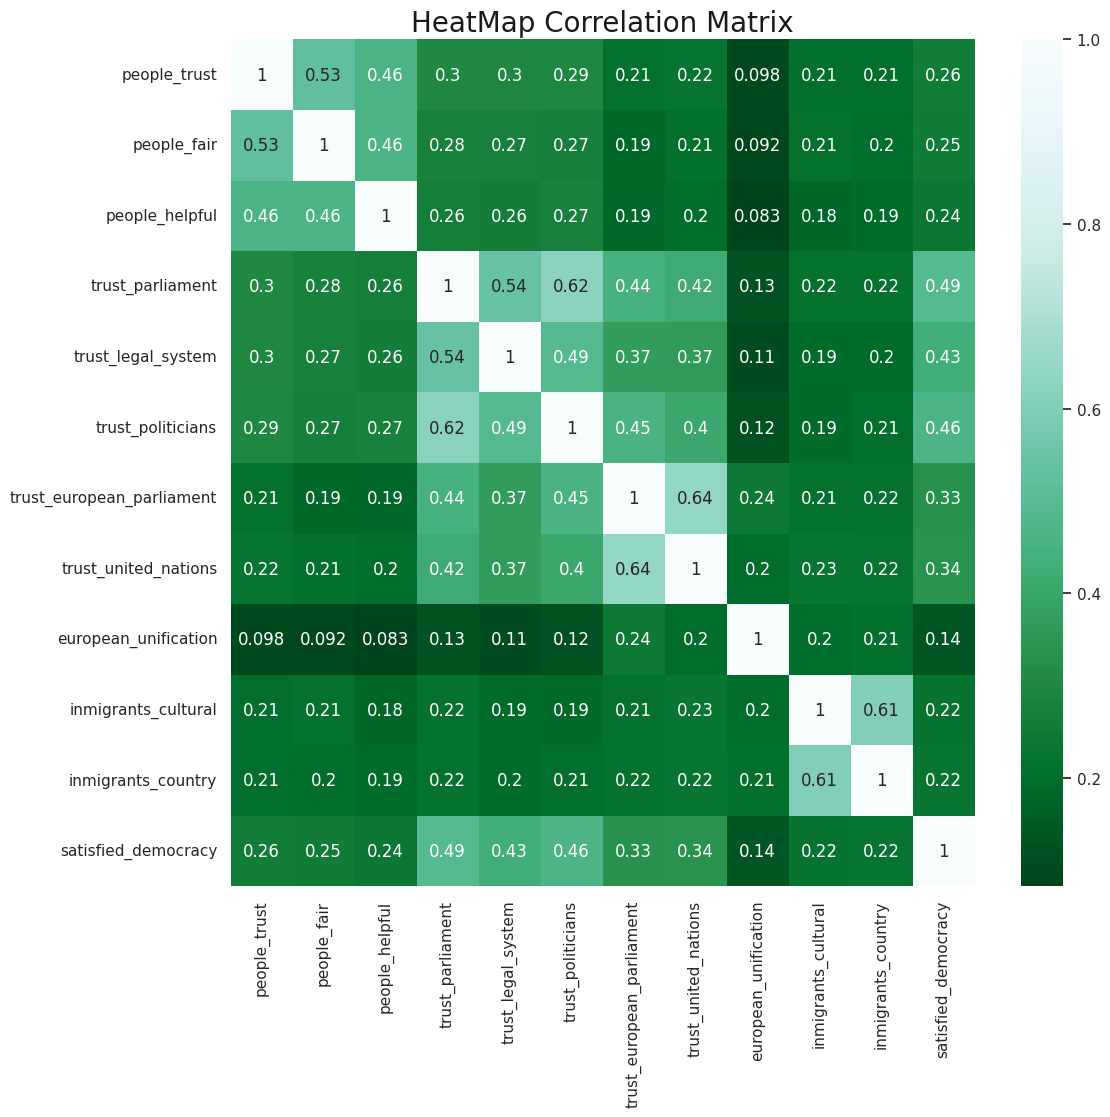

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(12,11)
plt.title('HeatMap Correlation Matrix', size = 20, color = 'Black', alpha = 0.9)
# Correlation
corr = data_filtered.corr(method = "kendall") #Se usa correlación de Kendall para datos categóricos.
# Heatmap
sns.heatmap(corr, cmap="BuGn_r",annot=True)

# **4.Agrupamiento**

## **4.1. Estandarizamos las variables**

In [ ]:
scaler = StandardScaler()
data_scale = scaler.fit_transform(data_filtered)
data_scale[0:5]

array([[ 0.39983564,  0.64860673, -0.37057414,  0.93881708,  0.64120613,
         0.11789418,  1.28389532, -0.09158897, -0.15364285,  0.98371571,
         1.62374125,  0.26753144],
       [-0.78561395, -0.6392814 , -0.78627635,  0.18728785, -0.0813178 ,
        -0.28407463, -0.31421783, -0.88861649, -0.15364285, -0.15405882,
        -0.03179146, -0.12341289],
       [ 0.39983564,  1.07790277,  0.04512808,  0.56305247,  1.00246809,
         0.92183179,  0.88436703,  1.1039523 ,  1.0359532 , -0.15405882,
        -0.03179146,  0.26753144],
       [ 0.79498551, -0.20998536,  0.04512808,  1.3145817 ,  1.72499202,
         1.72576941,  2.0829519 ,  1.90097981, -0.15364285,  0.98371571,
         1.20985808,  1.83130876],
       [-0.78561395,  1.07790277,  1.29223473,  0.93881708,  0.64120613,
         1.3238006 ,  0.48483875,  0.70543854,  1.43248522,  0.60445753,
         0.38209172, -0.12341289]])

In [ ]:
df_estandarizado = pd.DataFrame(data_scale)
df_estandarizado

0         1         2         3         4         5         6   \
0      0.399836  0.648607 -0.370574  0.938817  0.641206  0.117894  1.283895   
1     -0.785614 -0.639281 -0.786276  0.187288 -0.081318 -0.284075 -0.314218   
2      0.399836  1.077903  0.045128  0.563052  1.002468  0.921832  0.884367   
3      0.794986 -0.209985  0.045128  1.314582  1.724992  1.725769  2.082952   
4     -0.785614  1.077903  1.292235  0.938817  0.641206  1.323801  0.484839   
...         ...       ...       ...       ...       ...       ...       ...   
37606  0.004686 -0.209985  0.045128 -0.564241 -1.165104  1.323801 -0.314218   
37607  0.794986  0.219311  0.460830  0.938817  0.641206  1.725769  1.283895   
37608 -1.971064 -2.356466 -1.201979 -1.315771 -1.526366 -1.088012 -0.314218   
37609 -1.180764 -1.497873 -0.786276 -0.940006 -1.887628  1.323801 -0.314218   
37610  0.004686  0.219311  0.460830  0.938817  0.279944  0.921832  1.283895   

             7         8         9         10        11  
0     -0.091589 -0.153643  0.983716  1.623741  0.267531  
1     -0.888616 -0.153643 -0.154059 -0.031791 -0.123413  
2      1.103952  1.035953 -0.154059 -0.031791  0.267531  
3      1.900980 -0.153643  0.983716  1.209858  1.831309  
4      0.705439  1.432485  0.604458  0.382092 -0.123413  
...         ...       ...       ...       ...       ...  
37606  1.103952  1.432485  0.983716  0.382092 -0.514357  
37607 -0.091589  1.829017  0.604458  0.382092  1.831309  
37608 -0.490103  1.035953 -1.291833 -1.273441  0.658476  
37609 -0.091589 -0.153643  0.983716 -1.687324 -1.296246  
37610  0.705439  0.242889 -0.533317 -0.445675  1.049420  

[37611 rows x 12 columns]

## **4.2. K-means**

In [ ]:
# n_clusters, al ser un método particional debemos definir el número de clusters
# init, indica el método con el cuál vamos a escoger los puntos de inicio de los centroides
# random_state, definir una semilla para poder reproducir

kmeans = KMeans(
        init="random",
        n_clusters=3,
        random_state=2023
    )
kmeans.fit(df_estandarizado)

# Los atributos generados por el algoritmo son:

# cluster_centers_, los centroides de los clusters encontrados. Vemos como expone 3 clusters para el presente caso.
# labels_, la asignación de cluster para cada punto
# inertia_, suma de distancias cuadradas de cada punto a su centroide-Total Suma de cuadrados dentro (comparar métodos)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(init='random', n_clusters=3, random_state=2023)

Text(0.5, 1.0, 'Confianza en la democracia según cluster')

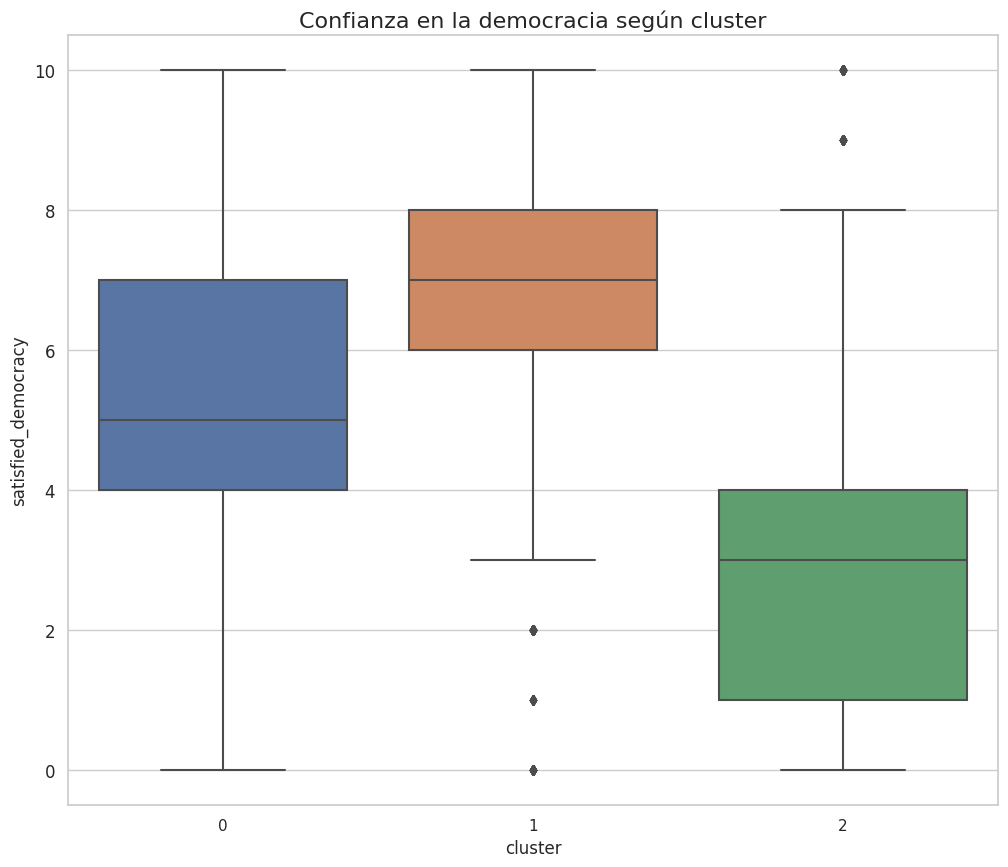

In [ ]:
#Guardamos la asignación del cluster en una nueva columna del data set

data_filtered['cluster'] = kmeans.labels_

#Y podemos visualizar cómo se comportan los clusters con respecto a las variables originales

plt.figure(figsize=(12,10))

sns.boxplot(y=data_filtered['satisfied_democracy'],x=data_filtered['cluster'])
plt.yticks(fontsize=12)
plt.title('Confianza en la democracia según cluster', fontsize=16)

In [ ]:
data_filtered.groupby('cluster')['satisfied_democracy','people_trust','trust_legal_system','trust_politicians','european_unification','inmigrants_country'].mean()

<ipython-input-30-9fcb2dfbcb80>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_filtered.groupby('cluster')['satisfied_democracy','people_trust','trust_legal_system','trust_politicians','european_unification','inmigrants_country'].mean()


satisfied_democracy  people_trust  trust_legal_system  \
cluster                                                          
0                   5.213548      4.659991            5.113789   
1                   7.308204      6.821229            7.462469   
2                   2.801515      3.091119            2.395982   

         trust_politicians  european_unification  inmigrants_country  
cluster                                                               
0                 3.414921              5.423821            5.018728  
1                 5.980037              6.226731            6.412400  
2                 1.149522              4.187507            3.373147

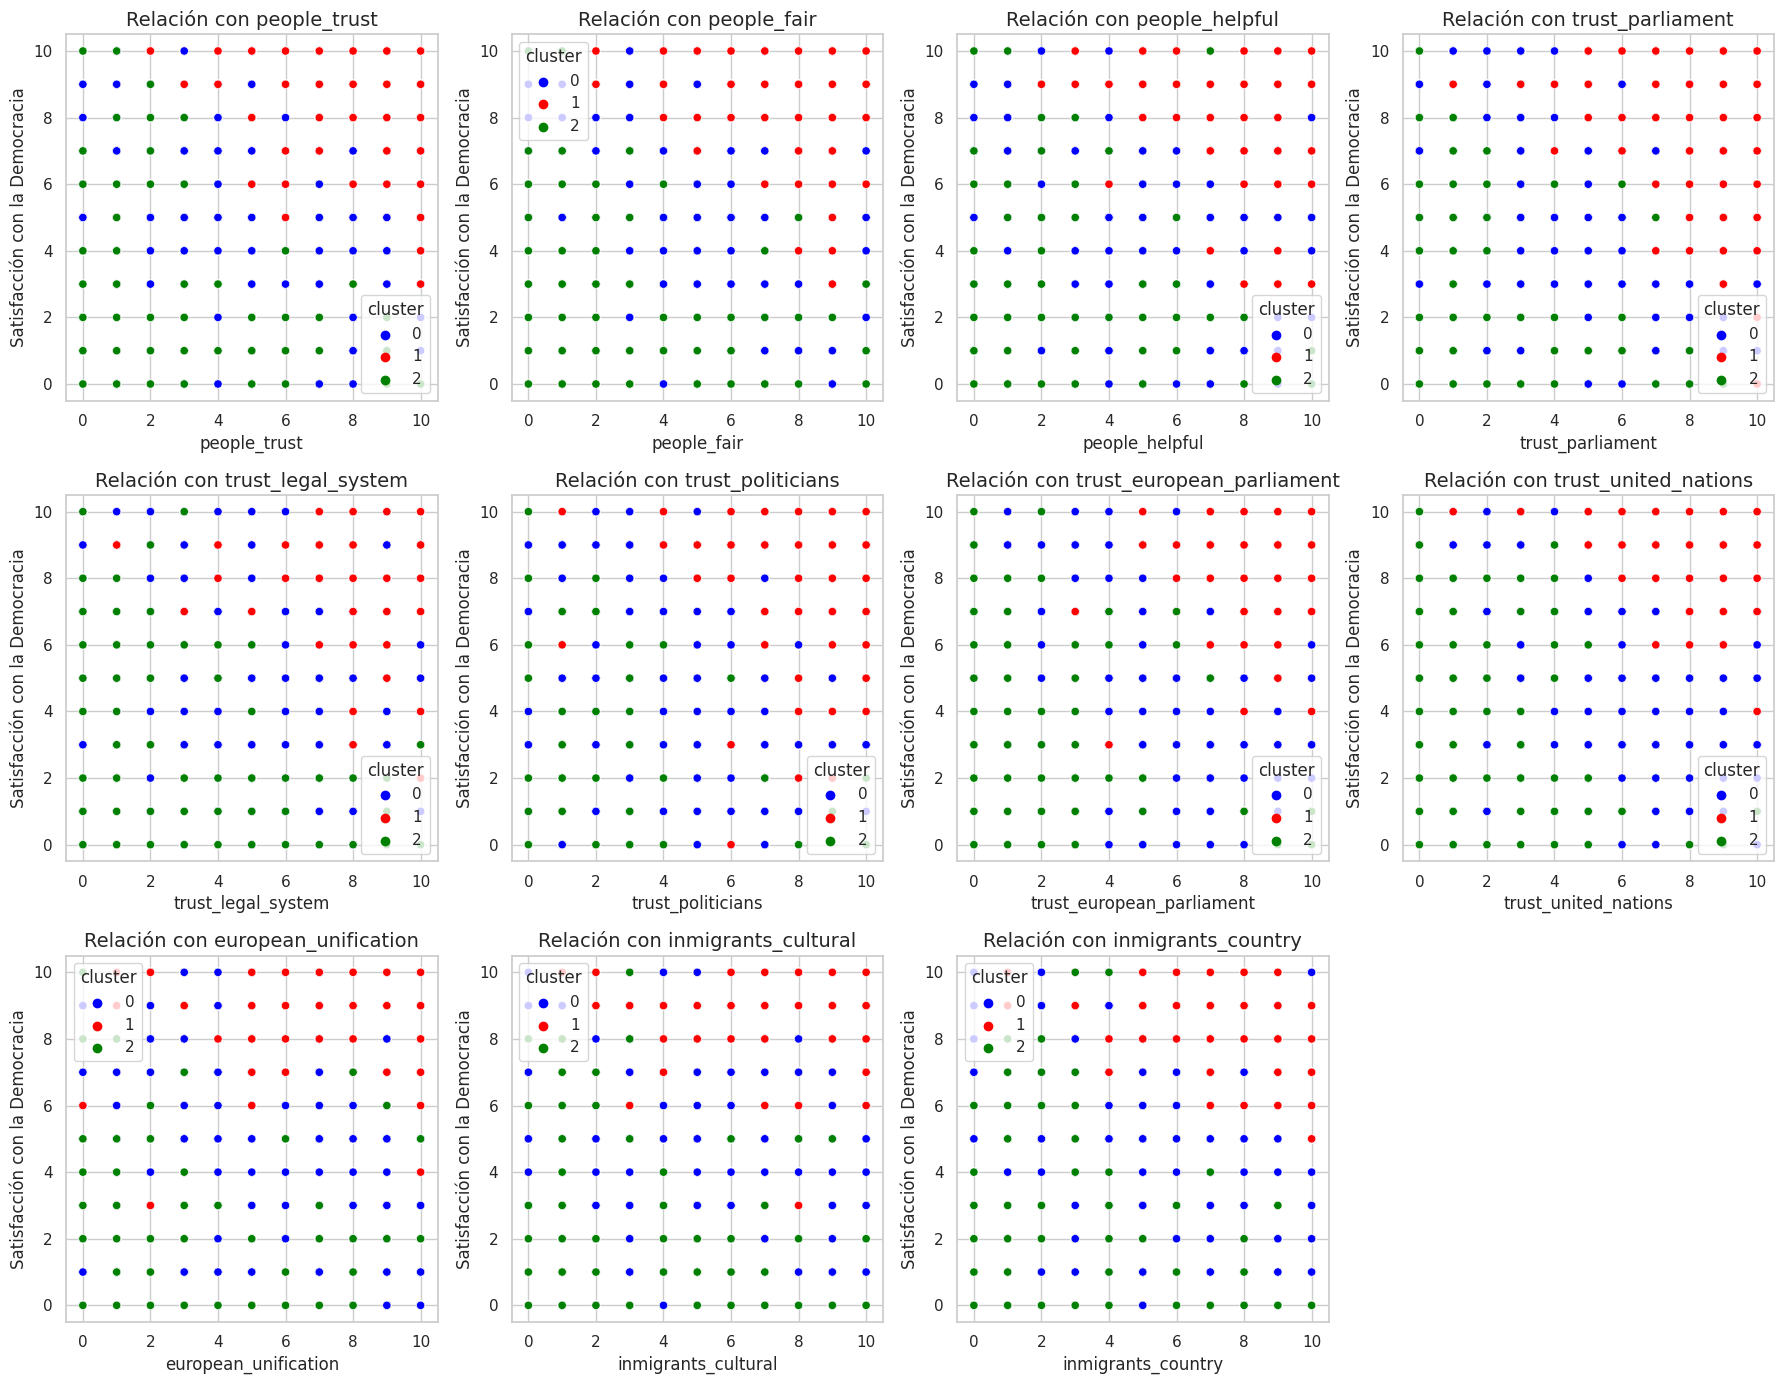

In [ ]:
# Lista de columnas a considerar en los gráficos (excluyendo 'stisfied_democracy')
columns_to_plot = ['people_trust', 'people_fair', 'people_helpful', 'trust_parliament',
                   'trust_legal_system', 'trust_politicians', 'trust_european_parliament',
                   'trust_united_nations', 'european_unification', 'inmigrants_cultural', 'inmigrants_country']

# Configura el tamaño de la figura
plt.figure(figsize=(18, 14))

# Define una paleta de colores personalizada (por ejemplo, "Set1")
custom_palette = sns.color_palette("Set1", n_colors=len(data_filtered['cluster'].unique()))

# Itera a través de las columnas y crea gráficos de dispersión por cluster con la paleta personalizada
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 4, i)  # Ajusta el número de filas y columnas según la cantidad de variables
    sns.scatterplot(x=data_filtered[column], y=data_filtered['satisfied_democracy'], hue=data_filtered['cluster'], palette = (['blue', 'red', 'green']))
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Satisfacción con la Democracia', fontsize=12)
    plt.title(f'Relación con {column}', fontsize=14)

# Ajusta el espacio entre los gráficos
plt.tight_layout()

# Muestra los gráficos
plt.show()

## **4.3. Jerárquico**

In [ ]:
#utilizaremos el agrupamiento de 3 clusters
jer = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')
#Guardemos el cluster asignado a cada observación
data_filtered['cluster_j']= jer.fit_predict(df_estandarizado)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
data_filtered["cluster"].value_counts()

0    16179
1    12323
2     9109
Name: cluster, dtype: int64

In [ ]:
#En esta tabla de contingencia podemos observar la combinación posible entre ambos métodos.
# con ello podemos ver cuantas veces converge una observación entre ambos clusters.
pd.crosstab(data_filtered['cluster'],data_filtered['cluster_j'])

#por ejemplo, tenemos 4212 elementos que pertenecen al cluster 0 y también al cluster 1 jerarquico
# hay composición similar en cluster 0 para ambos y en cluster 1 para ambos.

#De los 16179 que pertenecían al cluster 0 para el modelo particional, 4212 se fueron al cluster 1 y 963 al cluster 2 del modelo jerarquico

cluster_j      0      1     2
cluster                      
0          11004   4212   963
1            719  11600     4
2           2956      3  6150

Text(0.5, 1.0, 'Confianza en la democracia según cluster')

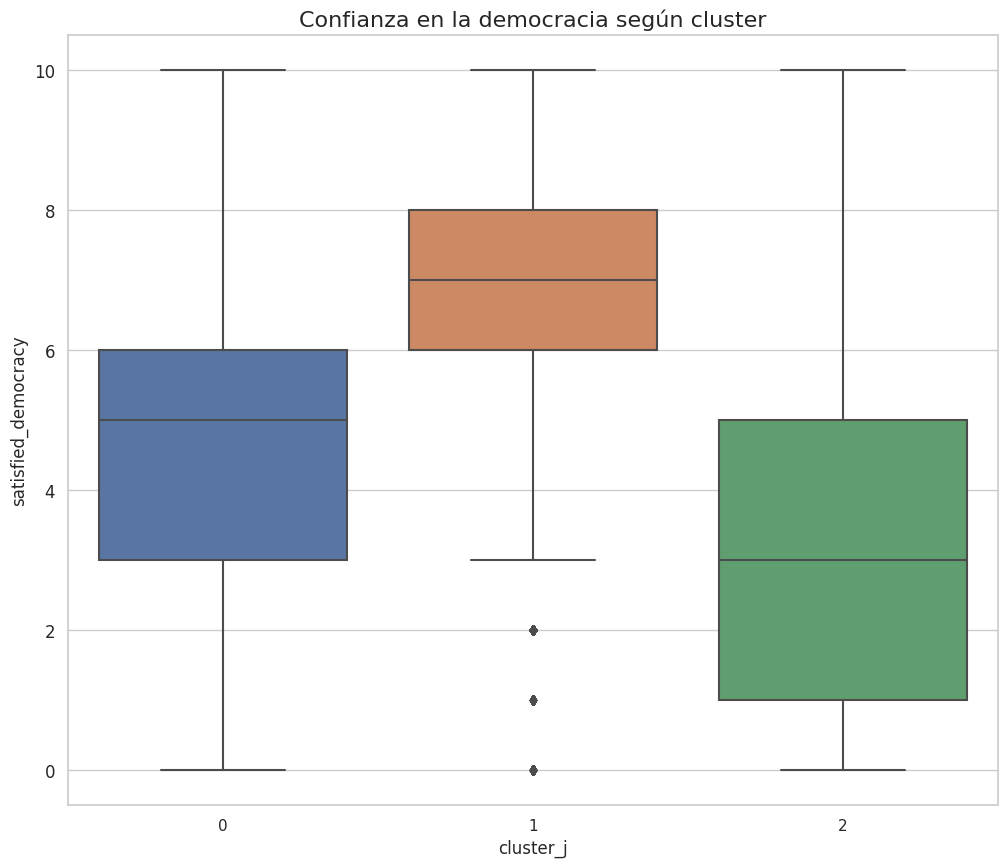

In [ ]:
plt.figure(figsize=(12,10))

sns.boxplot(y=data_filtered['satisfied_democracy'],x=data_filtered['cluster_j'])
plt.yticks(fontsize=12)
plt.title('Confianza en la democracia según cluster', fontsize=16)

In [ ]:
data_filtered.groupby('cluster_j')['satisfied_democracy','people_trust','trust_legal_system','trust_politicians','european_unification','inmigrants_country'].mean()

<ipython-input-36-d1e2ccc4d263>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_filtered.groupby('cluster_j')['satisfied_democracy','people_trust','trust_legal_system','trust_politicians','european_unification','inmigrants_country'].mean()


satisfied_democracy  people_trust  trust_legal_system  \
cluster_j                                                          
0                     4.806594      4.282649            4.606104   
1                     6.890800      6.411445            7.037053   
2                     2.865533      3.280455            2.475341   

           trust_politicians  european_unification  inmigrants_country  
cluster_j                                                               
0                   3.123442              5.175080            4.610328  
1                   5.390389              6.254126            6.240658  
2                   1.168329              3.899677            3.452719

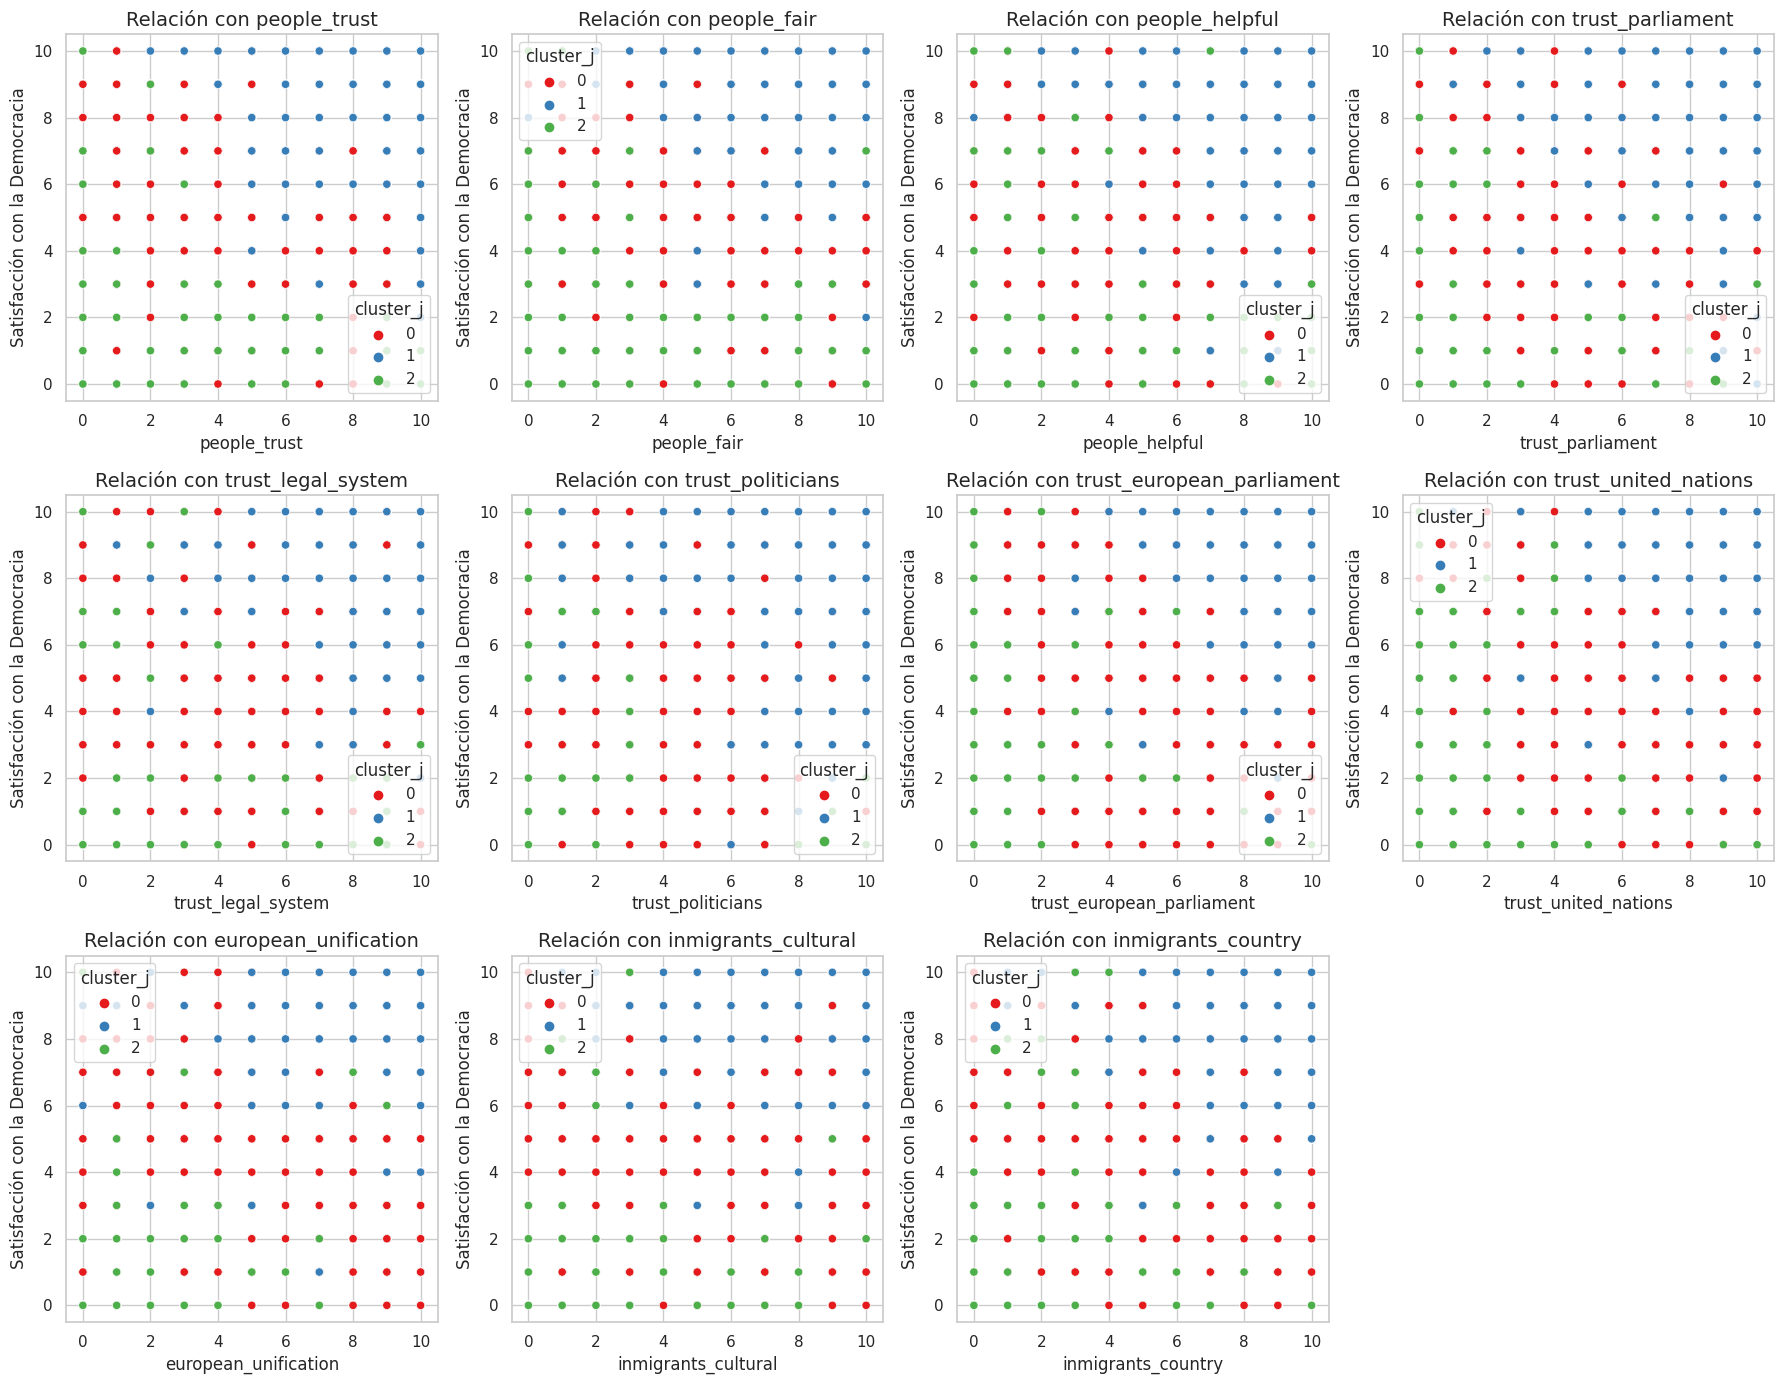

In [ ]:
# Configura el tamaño de la figura
plt.figure(figsize=(18, 14))

# Define una paleta de colores personalizada (por ejemplo, "Set1")
custom_palette = sns.color_palette("Set1", n_colors=len(data_filtered['cluster_j'].unique()))

# Itera a través de las columnas y crea gráficos de dispersión por cluster_j con la paleta personalizada
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 4, i)  # Ajusta el número de filas y columnas según la cantidad de variables
    sns.scatterplot(x=data_filtered[column], y=data_filtered['satisfied_democracy'], hue=data_filtered['cluster_j'], palette=custom_palette)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Satisfacción con la Democracia', fontsize=12)
    plt.title(f'Relación con {column}', fontsize=14)

# Ajusta el espacio entre los gráficos
plt.tight_layout()

# Muestra los gráficos
plt.show()

# **5.Validación**

## **5.1. Interna**

In [ ]:
# Creemos otro kmeans pero con 4 para hacer el contraste

kmeans4 = KMeans(
        init="random",
        n_clusters=4,
        random_state=2023
    )
kmeans4.fit(df_estandarizado)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(init='random', n_clusters=4, random_state=2023)

### **5.1.1. Cohesión**

In [ ]:
print(kmeans.inertia_)

290832.77654658374


In [ ]:
print(kmeans4.inertia_)
#menor inercia o cohesión con 4. Sin embargo la diferencia no es abismal teniendo en cuenta que a más clusters, menor inercia.

271859.0207523133


### **5.1.2. Coeficiente de Silhouette**

In [ ]:
# revisemos ahora con silohuette

score = silhouette_score(data_scale, kmeans.labels_)
print('Silhouetter Score 3 clusters: %.3f' % score)
#0.154 sugiere que los clusters están separados, pero no de manera muy clara.

Silhouetter Score 3 clusters: 0.154


In [ ]:
#modified code from http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

def silplot(X, clusterer, pointlabels=None):
    cluster_labels = clusterer.labels_
    n_clusters = clusterer.n_clusters

    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(11,8.5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])

    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters = ", n_clusters,
          ", the average silhouette_score is ", silhouette_avg,".",sep="")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(0,n_clusters+1):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=200, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    xs = X[:, 0]
    ys = X[:, 1]

    if pointlabels is not None:
        for i in range(len(xs)):
            plt.text(xs[i],ys[i],pointlabels[i])

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % int(i), alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

For n_clusters = 3, the average silhouette_score is 0.15395524388796497.


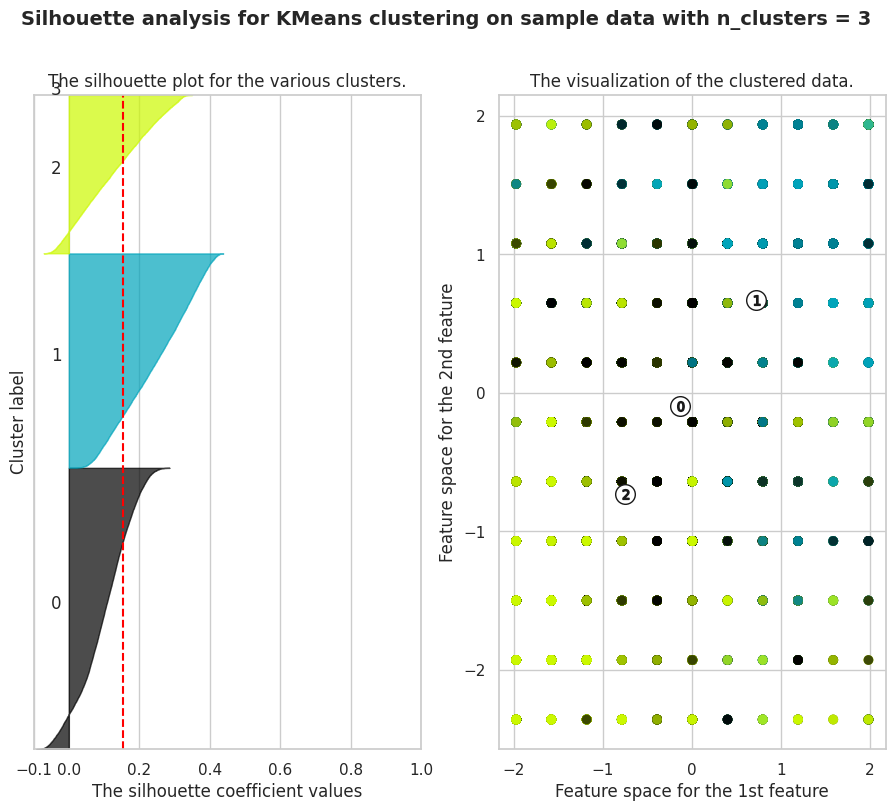

In [ ]:
silplot(data_scale, kmeans)

In [ ]:
score = silhouette_score(data_scale, kmeans4.labels_)
print('Silhouetter Score 4 clusters: %.3f' % score)
# es un valor similar asi que no hay variación significativa

Silhouetter Score 4 clusters: 0.146


For n_clusters = 4, the average silhouette_score is 0.1461808887157134.


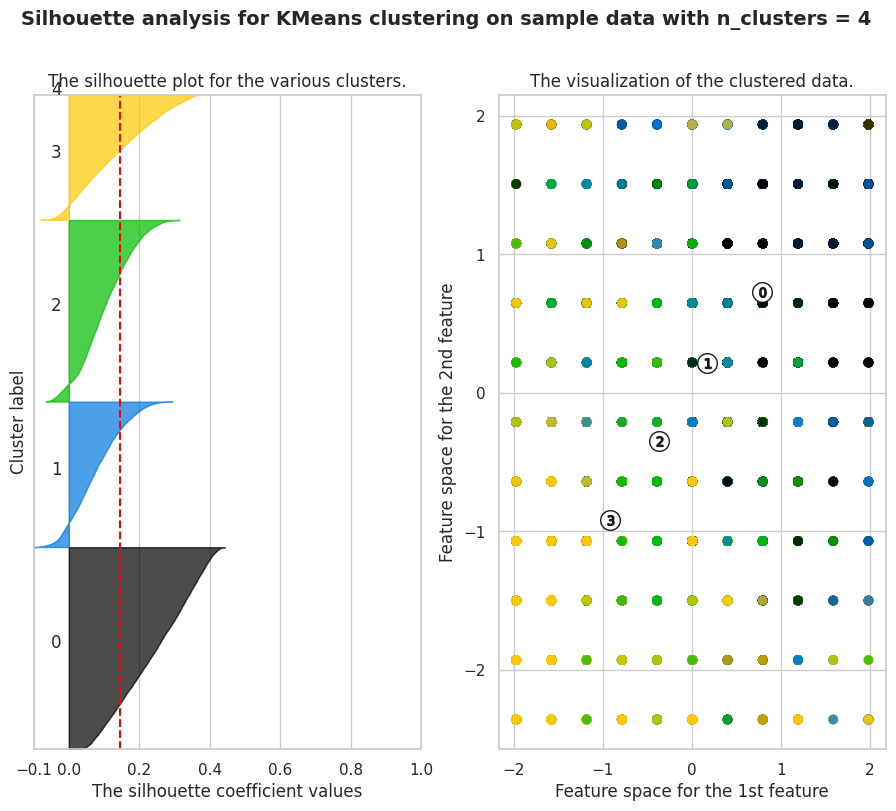

In [ ]:
silplot(data_scale, kmeans4)

Observe que en ambos casos hay grupos que llegan a ser negativos por lo que se evidencia una falta adecuada de definición y separación.
No obstante, es un poco menos evidente cuando hay 3 clusters. Debería hacerse sin embargo, una revisión para que queden mejor definidos.

## **5.2. Relativa**

### **5.2.1. Elbow method**

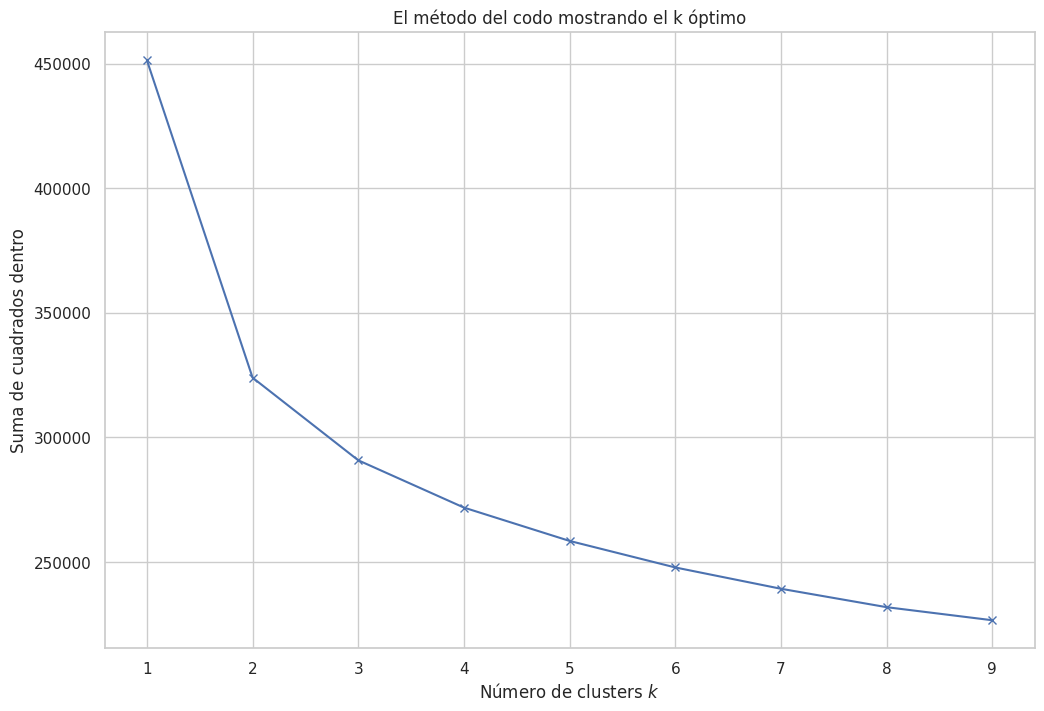

In [ ]:
# Apliquemos ahora el método del codo
ssw = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k,init="random",n_init=10,max_iter=300,random_state=42)
    kmeanModel.fit(data_scale)
    ssw.append(kmeanModel.inertia_)

plt.figure(figsize=(12,8))
plt.plot(K, ssw, 'bx-')
plt.xlabel('Número de clusters $k$')
plt.ylabel('Suma de cuadrados dentro')
plt.title('El método del codo mostrando el k óptimo')
plt.show()
# puede que 2 clusters sean los adecuados

### **5.2.2. Coeficiente de Silhouette**

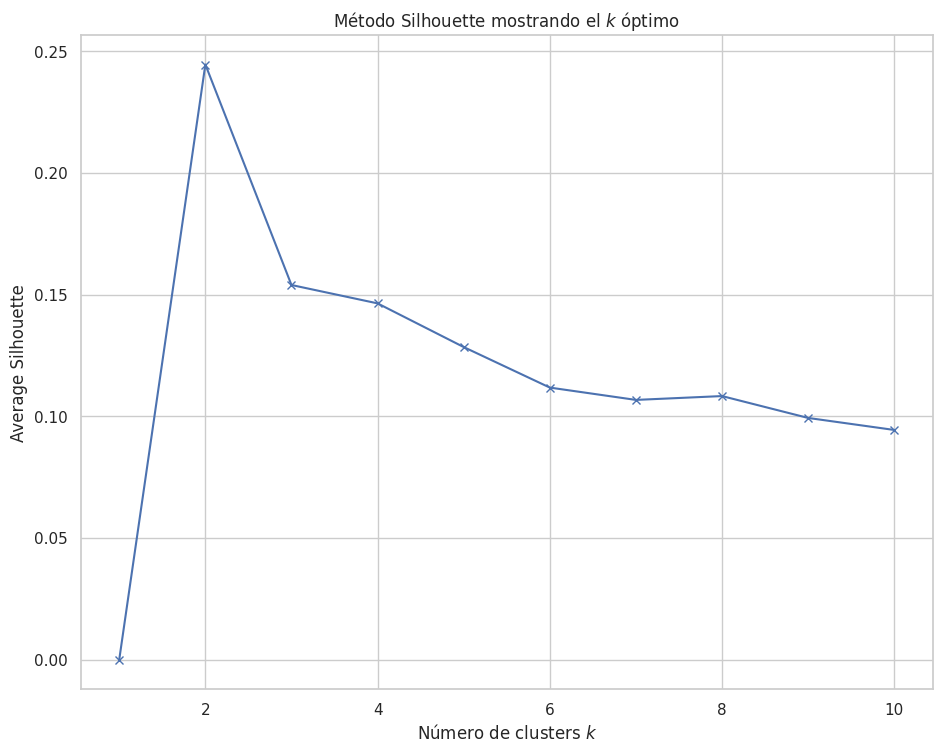

In [ ]:
# con el de silueta
scores = [0]
for k in range(2,11):
    fitx = KMeans(n_clusters=k,init="random",n_init=10,max_iter=300,random_state=42).fit(data_scale)
    score = silhouette_score(data_scale, fitx.labels_)
    scores.append(score)

plt.figure(figsize=(11,8.5))
plt.plot(range(1,11), np.array(scores), 'bx-')
plt.xlabel('Número de clusters $k$')
plt.ylabel('Average Silhouette')
plt.title('Método Silhouette mostrando el $k$ óptimo')
plt.show()

### **5.2.3. Evaluando sugerencias**

In [ ]:
#comparemos ahora 2 y 3

# Creemos otro kmeans pero con 4 para hacer el contraste

kmeans2 = KMeans(
        init="random",
        n_clusters=2,
        random_state=2023
    )
kmeans2.fit(df_estandarizado)


data_filtered['cluster_2k'] = kmeans2.labels_
data_filtered.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


people_trust  people_fair  people_helpful  trust_parliament  \
0           6.0          7.0             4.0               7.0   
1           3.0          4.0             3.0               5.0   
2           6.0          8.0             5.0               6.0   
3           7.0          5.0             5.0               8.0   
4           3.0          8.0             8.0               7.0   

   trust_legal_system  trust_politicians  trust_european_parliament  \
0                 7.0                4.0                        8.0   
1                 5.0                3.0                        4.0   
2                 8.0                6.0                        7.0   
3                10.0                8.0                       10.0   
4                 7.0                7.0                        6.0   

   trust_united_nations  european_unification  inmigrants_cultural  \
0                   5.0                   5.0                  8.0   
1                   3.0                   5.0                  5.0   
2                   8.0                   8.0                  5.0   
3                  10.0                   5.0                  8.0   
4                   7.0                   9.0                  7.0   

   inmigrants_country  satisfied_democracy  cluster  cluster_j  cluster_2k  
0                 9.0                  6.0        1          1           1  
1                 5.0                  5.0        0          0           0  
2                 5.0                  6.0        1          1           1  
3                 8.0                 10.0        1          1           1  
4                 6.0                  5.0        1          1           1

In [ ]:
print(data_filtered.cluster.value_counts())
data_filtered.cluster.value_counts().plot(kind='bar')

0    16179
1    12323
2     9109
Name: cluster, dtype: int64


<Axes: >

1    20713
0    16898
Name: cluster_2k, dtype: int64


<Axes: >

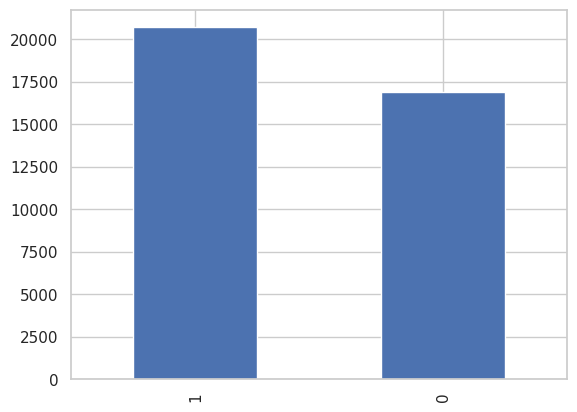

In [ ]:
print(data_filtered.cluster_2k.value_counts())
data_filtered.cluster_2k.value_counts().plot(kind='bar')

**Visualización 2 cluster**

Text(0.5, 1.0, 'Confianza en la democracia según cluster')

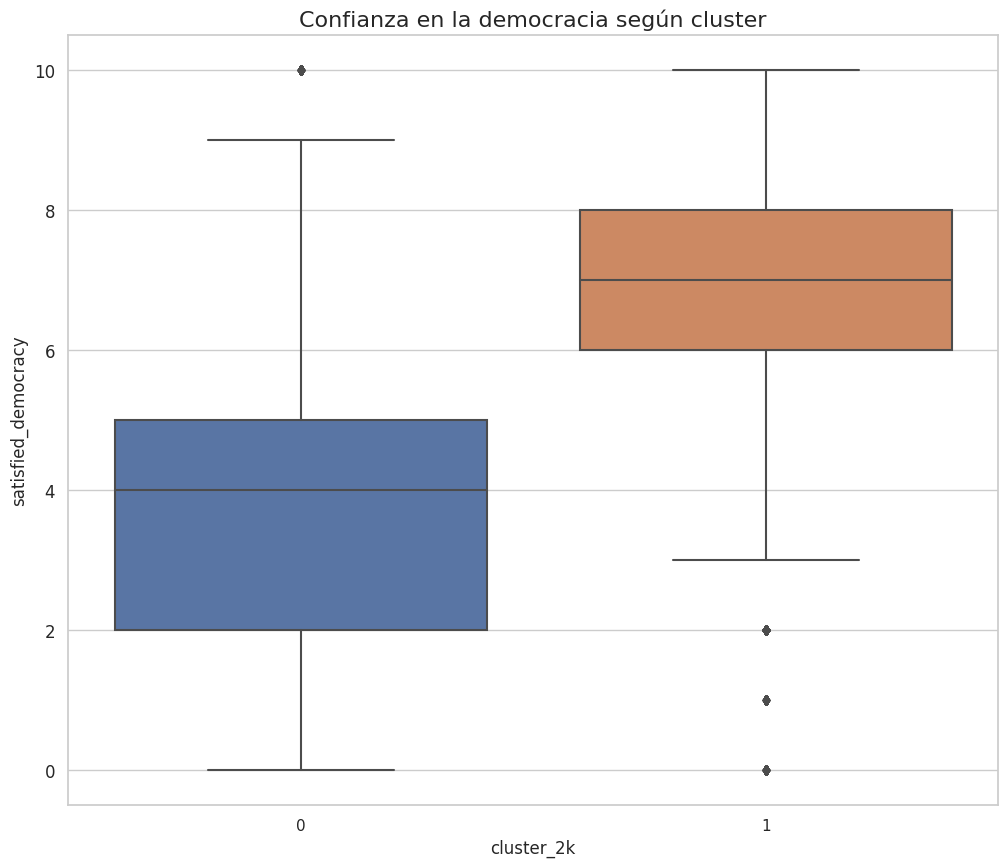

In [ ]:
plt.figure(figsize=(12,10))

sns.boxplot(y=data_filtered['satisfied_democracy'],x=data_filtered['cluster_2k'])
plt.yticks(fontsize=12)
plt.title('Confianza en la democracia según cluster', fontsize=16)

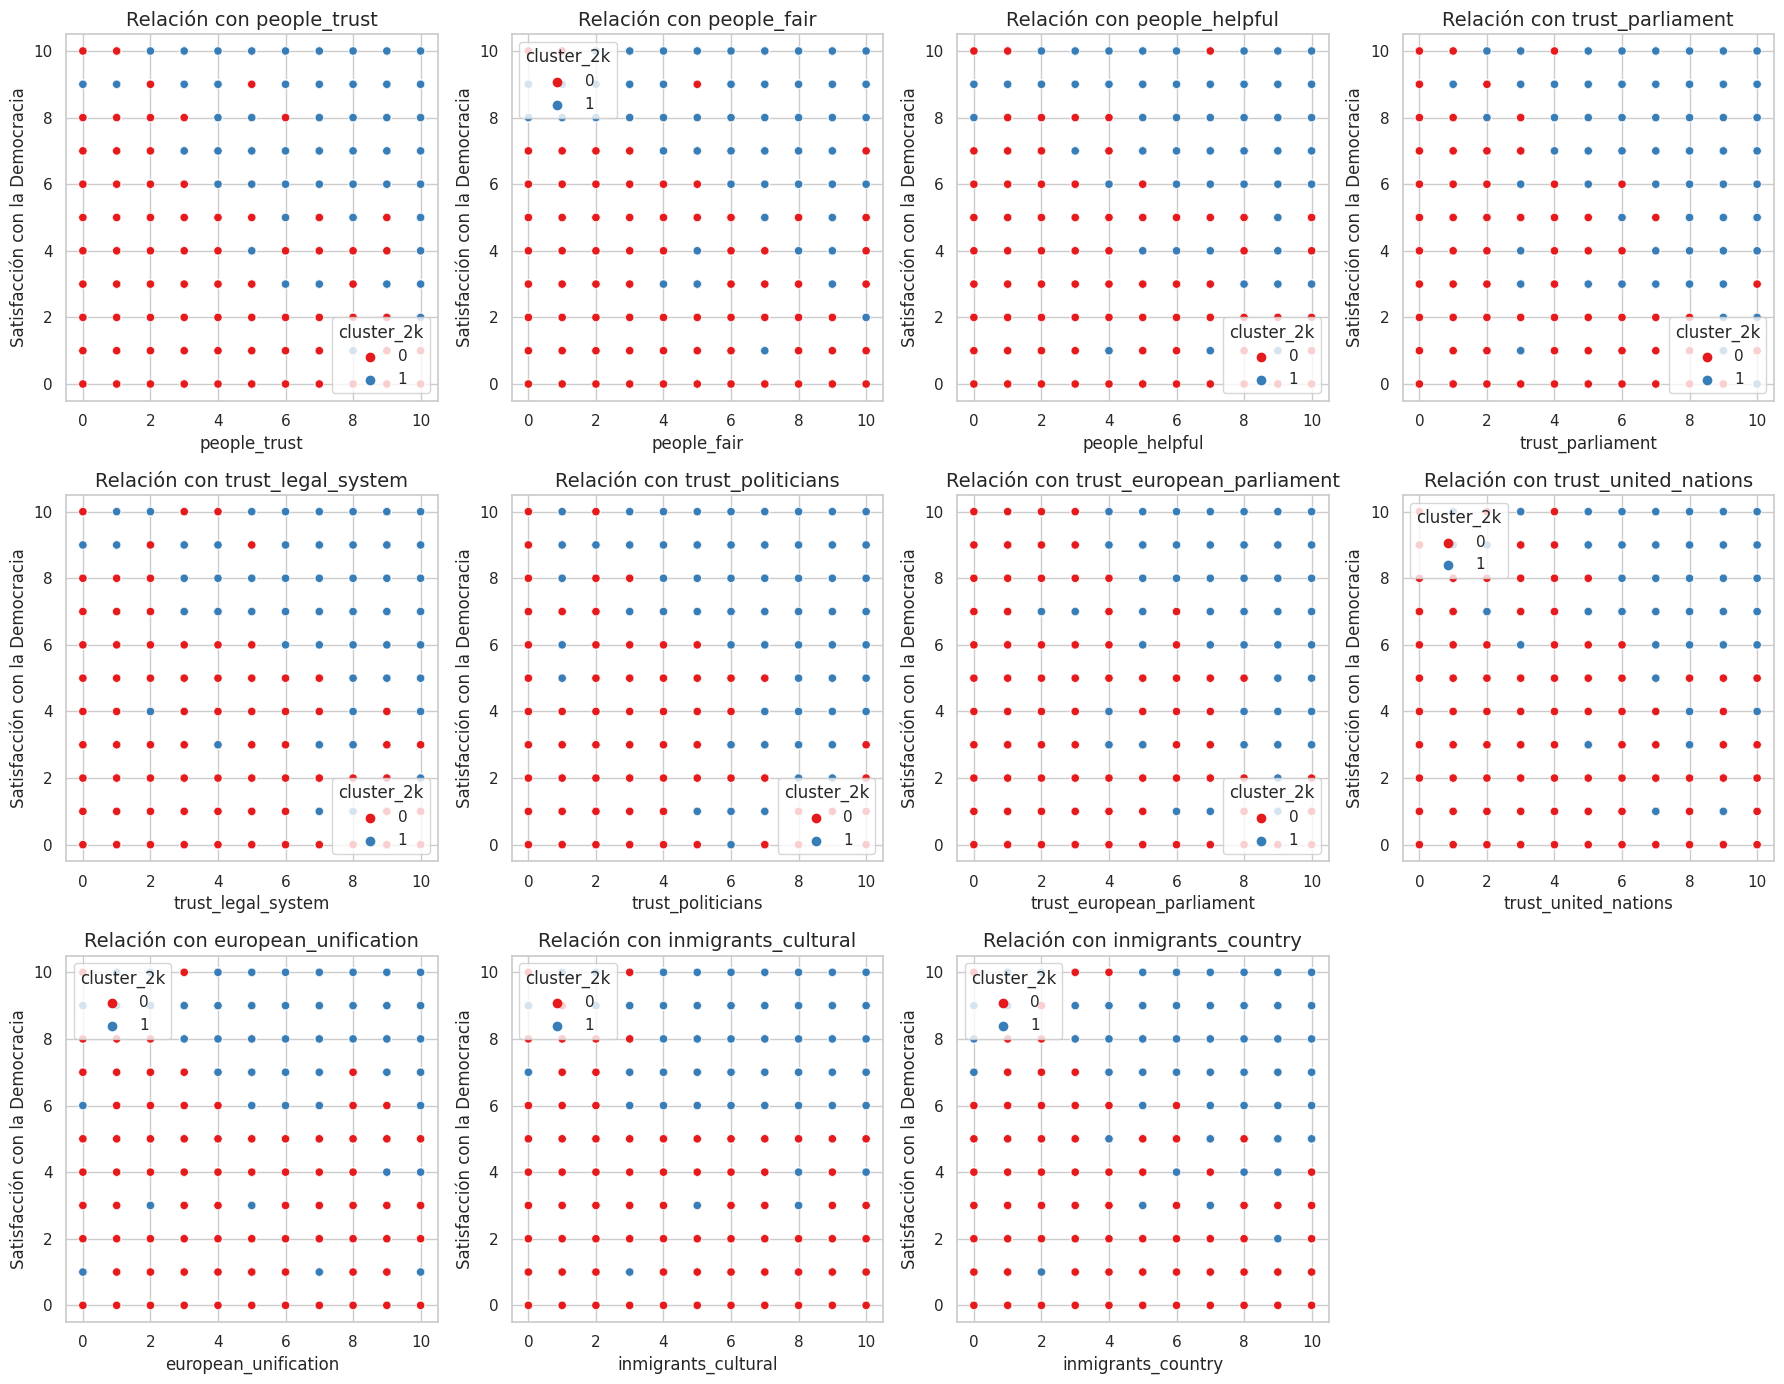

In [ ]:
# Configura el tamaño de la figura
plt.figure(figsize=(18, 14))

# Define una paleta de colores personalizada (por ejemplo, "Set1")
custom_palette = sns.color_palette("Set1", n_colors=len(data_filtered['cluster_2k'].unique()))

# Itera a través de las columnas y crea gráficos de dispersión por cluster_j con la paleta personalizada
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 4, i)  # Ajusta el número de filas y columnas según la cantidad de variables
    sns.scatterplot(x=data_filtered[column], y=data_filtered['satisfied_democracy'], hue=data_filtered['cluster_2k'], palette=custom_palette)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Satisfacción con la Democracia', fontsize=12)
    plt.title(f'Relación con {column}', fontsize=14)

# Ajusta el espacio entre los gráficos
plt.tight_layout()

# Muestra los gráficos
plt.show()

**Cohesión**

In [ ]:
print(kmeans.inertia_)

290832.77654658374


In [ ]:
print(kmeans2.inertia_)

323990.33405541617


**Coeficiente de Silhouette**

In [ ]:
score = silhouette_score(data_scale, kmeans.labels_)
print('Silhouetter Score 3 clusters: %.3f' % score)

Silhouetter Score 3 clusters: 0.154


In [ ]:
score = silhouette_score(data_scale, kmeans2.labels_)
print('Silhouetter Score 2 clusters: %.3f' % score)

Silhouetter Score 2 clusters: 0.245


For n_clusters = 2, the average silhouette_score is 0.24466925305115794.


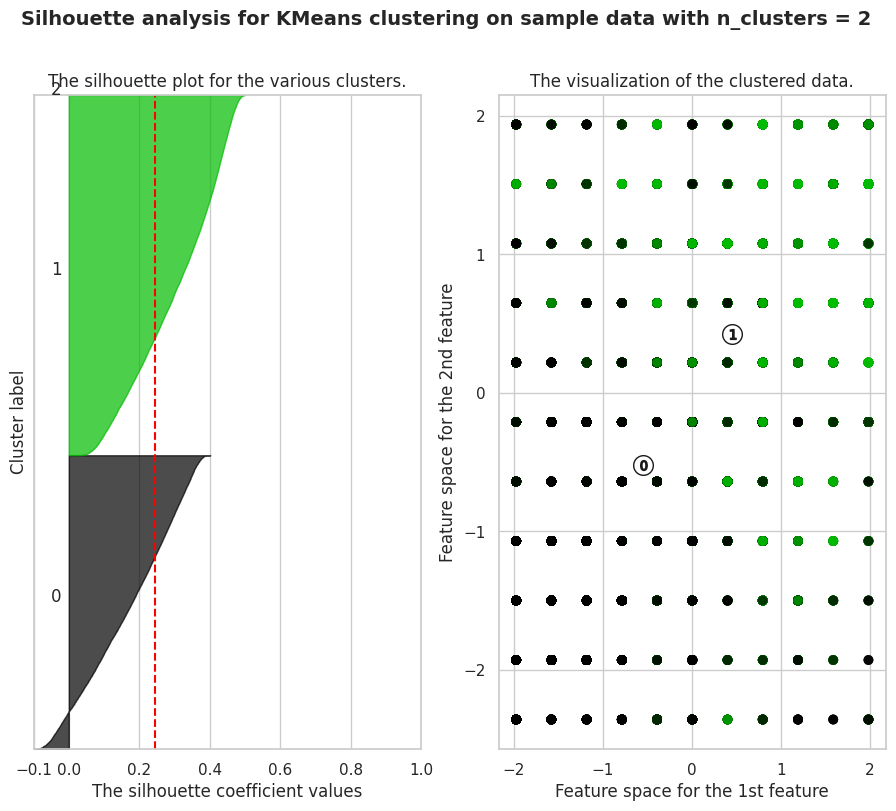

In [ ]:
silplot(data_scale, kmeans2)

### **5.2.4. ACP vs k-means**

In [ ]:
#Utilizamos el input de CPA para armar los cluster
pca = PCA(n_components=5)
pca_bs = pca.fit(data_filtered)
pca_bs = pca.transform(data_filtered)

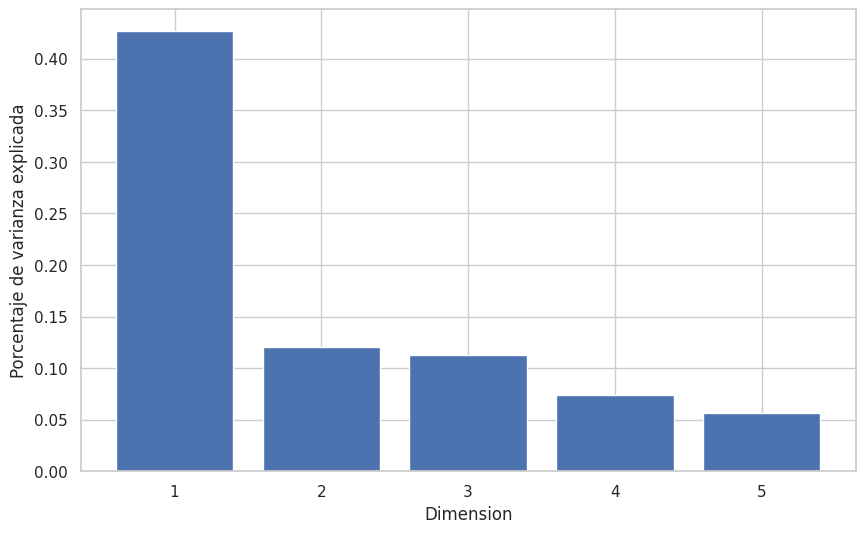

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(np.array([1,2,3,4,5]),pca.explained_variance_ratio_)
ax.set(xlabel = "Dimension",
       ylabel = "Porcentaje de varianza explicada")
plt.show()
#El primer CPA tiene más del 40% de varianza explicada

In [ ]:
pca.explained_variance_ratio_

array([0.42664494, 0.12028482, 0.11261553, 0.07382623, 0.05599743])

In [ ]:
pca.explained_variance_ratio_[:3].sum()#El 55% de la info real/original es explicada por los primeros dos componentes

0.6595452858350275

In [ ]:
#DataFrame con los 5 componentes
principalDf = pd.DataFrame(data = pca_bs, columns = ['PC1', 'PC2','PC3', 'PC4','PC5'])
principalDf.head()

PC1       PC2       PC3       PC4       PC5
0   4.690555 -2.069317 -1.244573 -2.037225  1.001722
1  -2.634830  0.670615 -1.493661 -1.779095 -1.279945
2   5.291506  1.410593 -0.609149  2.516818 -0.453089
3  10.798729  1.923767 -3.175534 -2.044567  1.841173
4   5.442726 -0.661078 -1.107767  1.739625 -1.351312

In [ ]:
#A los datos (data_filtered) se les asigna su respectivo componente
data_filtered['CP1'] = principalDf['PC1']
data_filtered['CP2'] = principalDf['PC2']
data_filtered['CP3'] = principalDf['PC3']

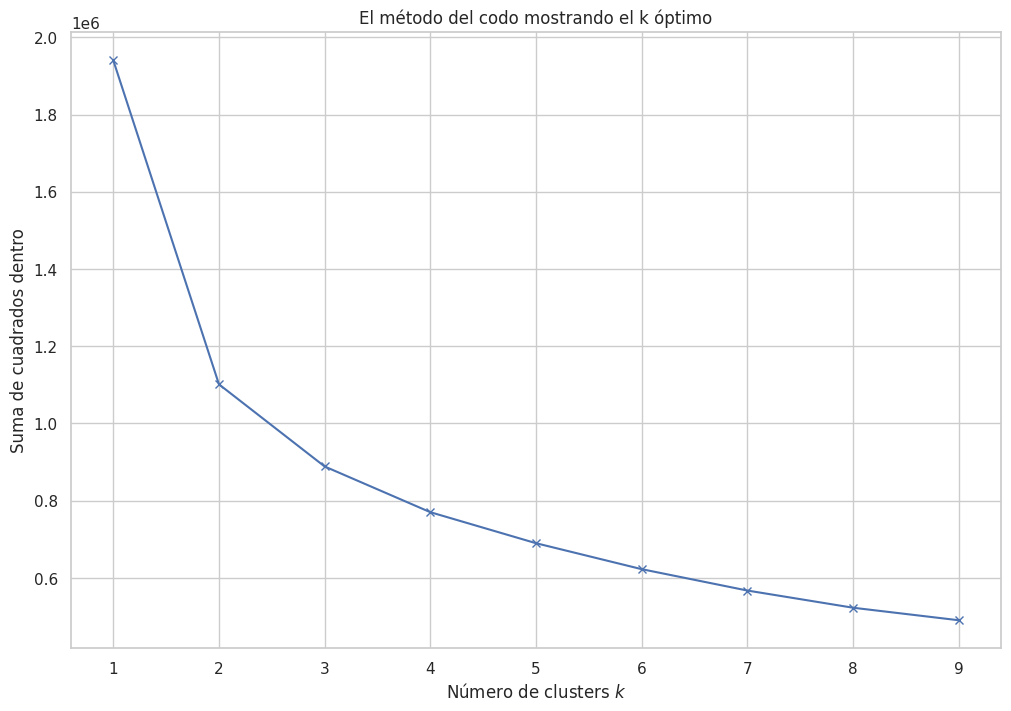

In [ ]:
#No usamos los datos reales si no los datos vía los tres primeros componentes
ssw = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k,init="random",n_init=10,max_iter=300,random_state=42)
    kmeanModel.fit(data_filtered[['CP1','CP2','CP3']])
    ssw.append(kmeanModel.inertia_)

plt.figure(figsize=(12,8))
plt.plot(K, ssw, 'bx-')
plt.xlabel('Número de clusters $k$')
plt.ylabel('Suma de cuadrados dentro')
plt.title('El método del codo mostrando el k óptimo')
plt.show() #Observe que se ve muy similar, sugiere 2 cluster

In [ ]:
kmeans_acp = KMeans(init="random",n_clusters=2,n_init=10,max_iter=300,random_state=42)
kmeans_acp.fit(data_filtered[['CP1','CP2','CP3']])

KMeans(init='random', n_clusters=2, n_init=10, random_state=42)

#### **5.2.4.1. Cohesión**

In [ ]:
print(kmeans_acp.inertia_) #Cohesión con CPA
print(kmeans2.inertia_) #Cohesión con datos reales

1101427.166476762
323990.33405541617


#### **5.2.4.2. Coeficiente de Silhouette**

In [ ]:
score = silhouette_score(data_filtered[['CP1','CP2','CP3']], kmeans_acp.labels_)
print('Silhouetter Score clusters ACP: %.3f' % score)

Silhouetter Score clusters ACP: 0.366


In [ ]:
score = silhouette_score(data_filtered, kmeans2.labels_)
print('Silhouetter Score 4 clusters: %.3f' % score)

Silhouetter Score 4 clusters: 0.289


For n_clusters = 2, the average silhouette_score is 0.36592738918064416.


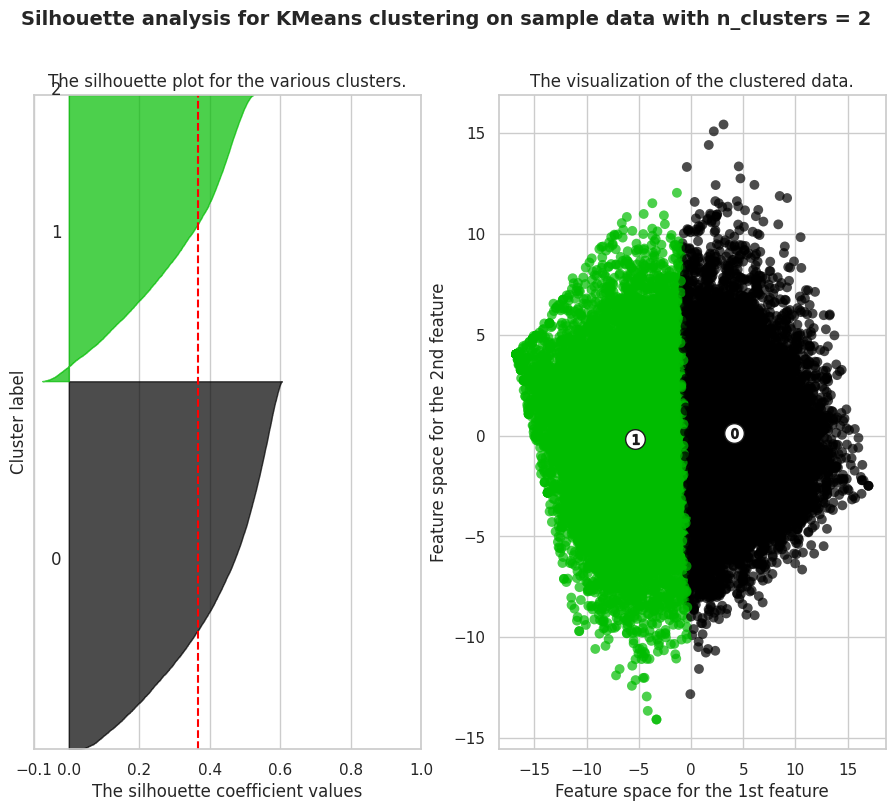

In [ ]:
silplot(data_filtered[['CP1','CP2','CP3']].values,kmeans_acp)

In [ ]:
data_filtered['cluster_acp'] = kmeans_acp.labels_

In [ ]:
data_filtered.columns

Index(['people_trust', 'people_fair', 'people_helpful', 'trust_parliament',
       'trust_legal_system', 'trust_politicians', 'trust_european_parliament',
       'trust_united_nations', 'european_unification', 'inmigrants_cultural',
       'inmigrants_country', 'satisfied_democracy', 'cluster', 'cluster_j',
       'cluster_2k', 'CP1', 'CP2', 'CP3', 'cluster_acp'],
      dtype='object')

In [ ]:
data_filtered['cluster_2k'].value_counts()

1    20713
0    16898
Name: cluster_2k, dtype: int64

In [ ]:
pd.crosstab(data_filtered['cluster_2k'],data_filtered['cluster_acp'])

cluster_acp      0      1
cluster_2k               
0              502  16396
1            20650     63

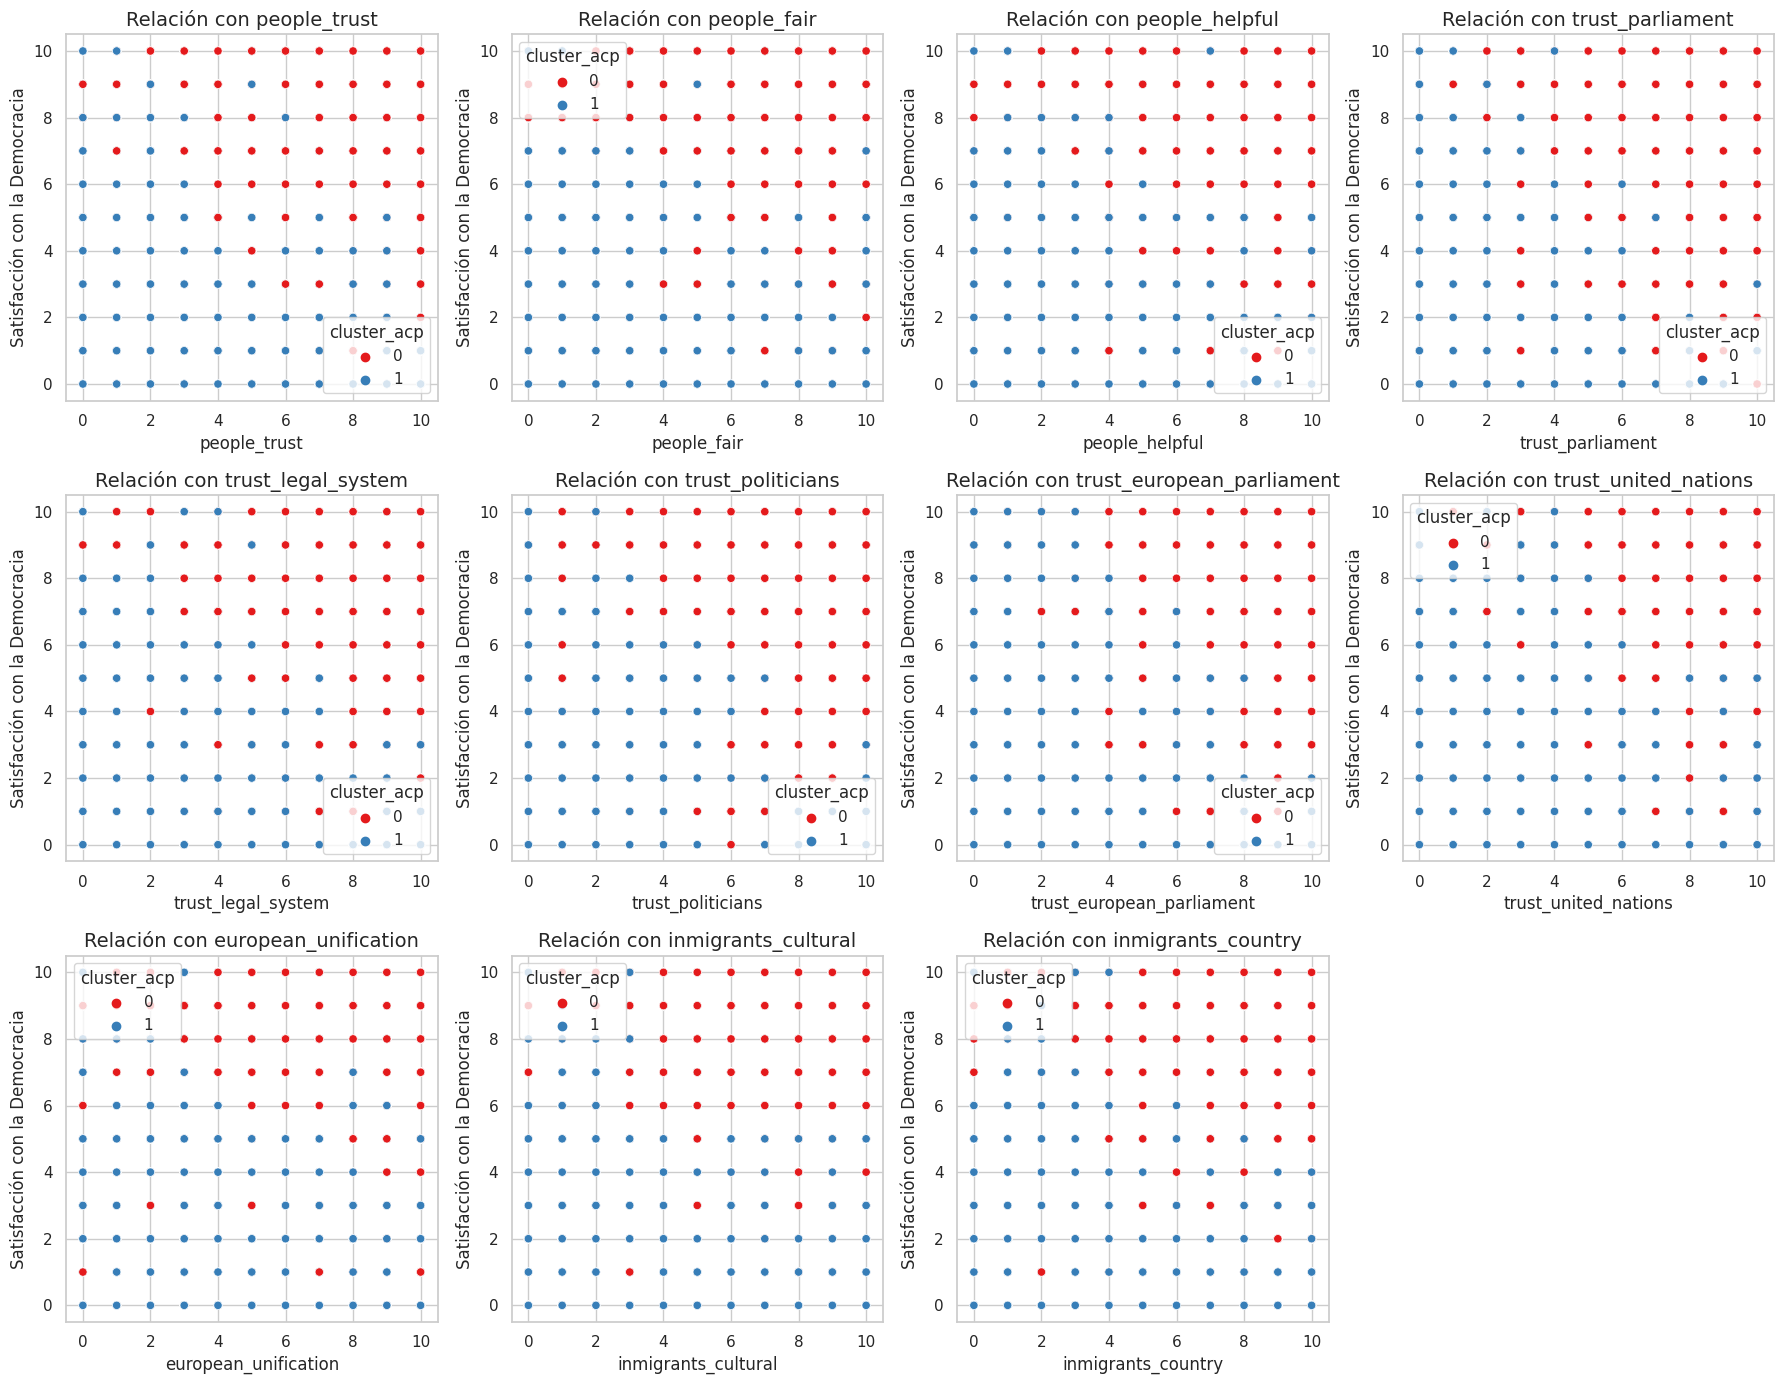

In [ ]:
# Configura el tamaño de la figura
plt.figure(figsize=(18, 14))

# Define una paleta de colores personalizada (por ejemplo, "Set1")
custom_palette = sns.color_palette("Set1", n_colors=len(data_filtered['cluster_acp'].unique()))

# Itera a través de las columnas y crea gráficos de dispersión por cluster_j con la paleta personalizada
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 4, i)  # Ajusta el número de filas y columnas según la cantidad de variables
    sns.scatterplot(x=data_filtered[column], y=data_filtered['satisfied_democracy'], hue=data_filtered['cluster_acp'], palette=custom_palette)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Satisfacción con la Democracia', fontsize=12)
    plt.title(f'Relación con {column}', fontsize=14)

# Ajusta el espacio entre los gráficos
plt.tight_layout()

# Muestra los gráficos
plt.show()

In [ ]:
data_filtered.columns

Index(['people_trust', 'people_fair', 'people_helpful', 'trust_parliament',
       'trust_legal_system', 'trust_politicians', 'trust_european_parliament',
       'trust_united_nations', 'european_unification', 'inmigrants_cultural',
       'inmigrants_country', 'satisfied_democracy', 'cluster', 'cluster_j',
       'cluster_2k', 'CP1', 'CP2', 'CP3', 'cluster_acp'],
      dtype='object')

Text(0.5, 1.0, 'Confianza en la democracia según cluster')

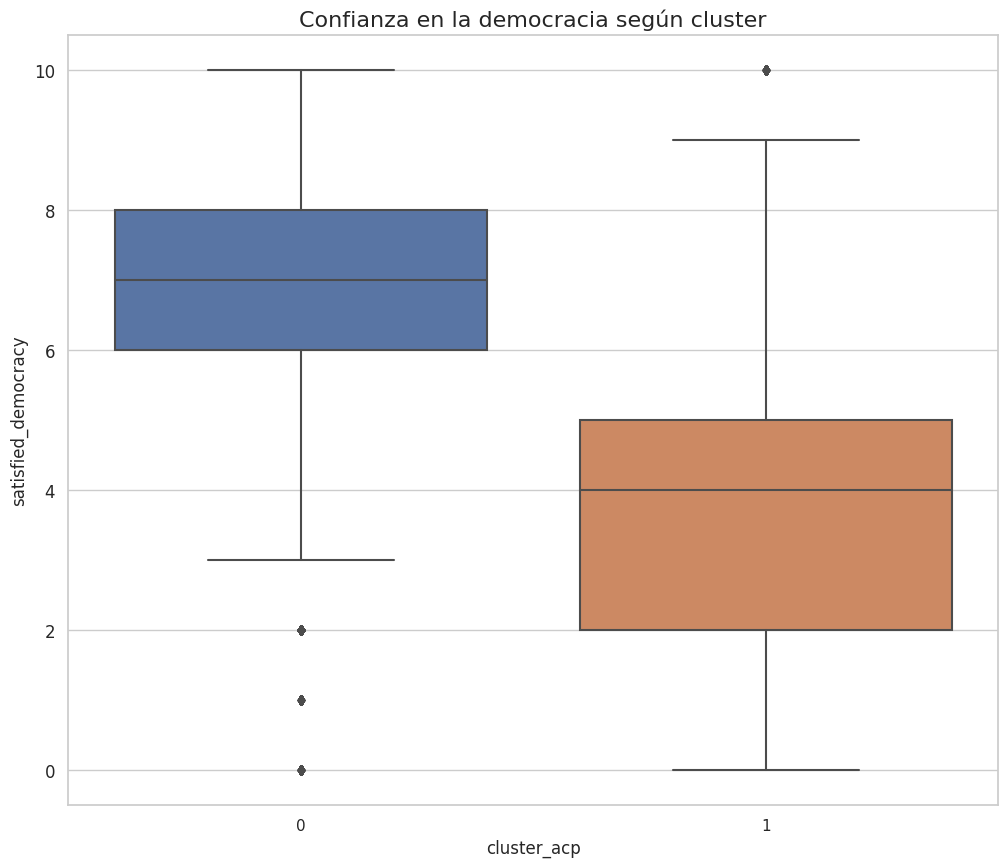

In [ ]:
plt.figure(figsize=(12,10))

sns.boxplot(y=data_filtered['satisfied_democracy'],x=data_filtered['cluster_acp'])
plt.yticks(fontsize=12)
plt.title('Confianza en la democracia según cluster', fontsize=16)

Text(0.5, 1.0, 'Confianza en las personas según cluster')

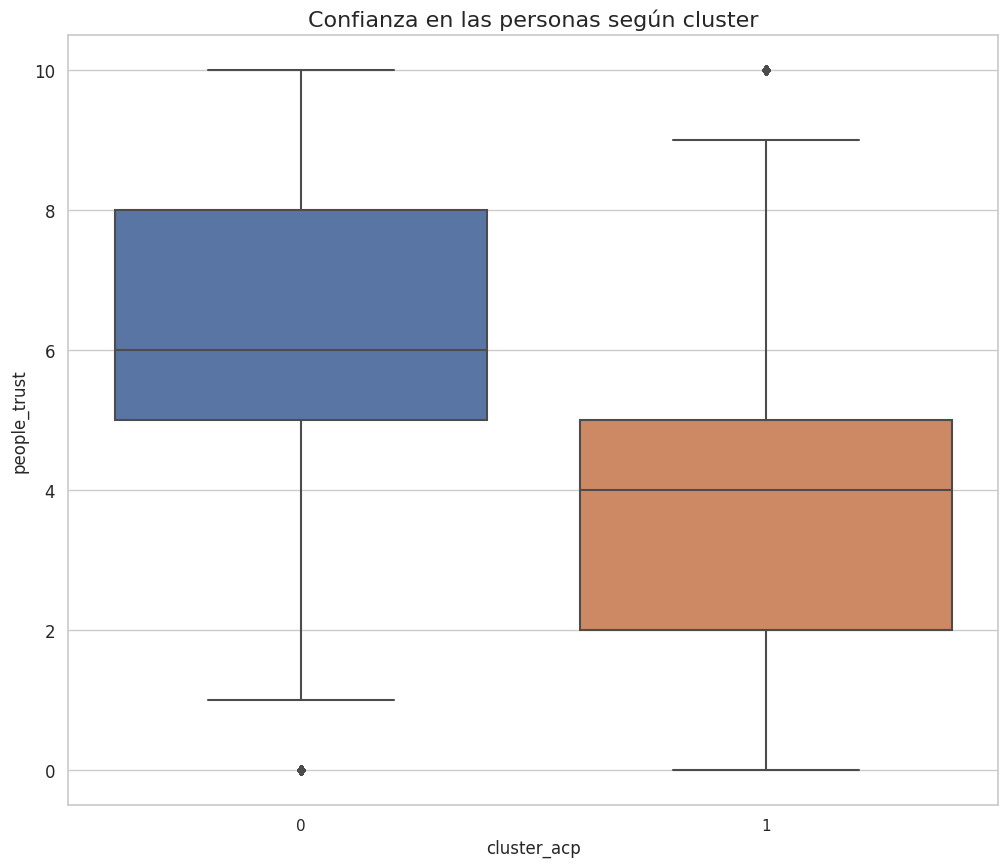

In [ ]:
plt.figure(figsize=(12,10))

sns.boxplot(y=data_filtered['people_trust'],x=data_filtered['cluster_acp'])
plt.yticks(fontsize=12)
plt.title('Confianza en las personas según cluster', fontsize=16)

Text(0.5, 1.0, 'Confianza en los políticos según cluster')

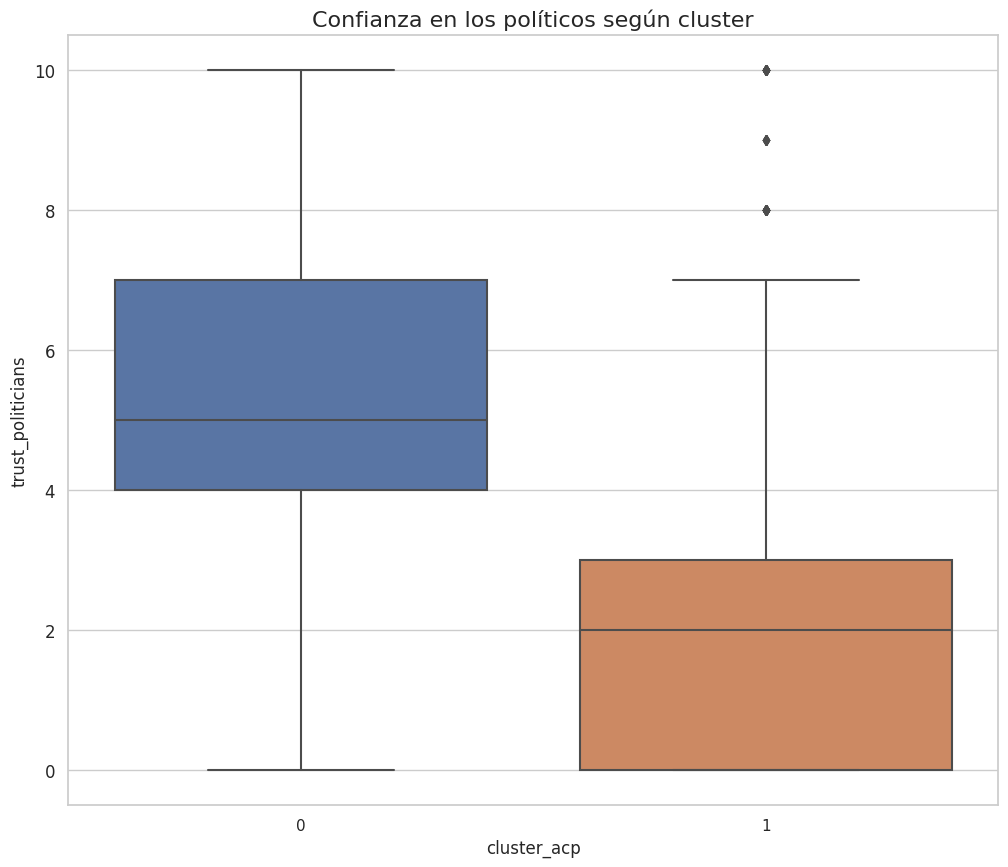

In [ ]:
plt.figure(figsize=(12,10))

sns.boxplot(y=data_filtered['trust_politicians'],x=data_filtered['cluster_acp'])
plt.yticks(fontsize=12)
plt.title('Confianza en los políticos según cluster', fontsize=16)